## 🍿 **1. Research Context and Problem Definition**



Understanding what drives audience ratings is a central question in movie analytics and recommendation systems.
The MovieLens 32M dataset provides a large-scale basis to explore this topic, combining millions of user ratings, tags, and movie metadata.
The guiding research question of this project is:
Which factors — genre, number of ratings, and popularity — most influence the average movie rating within the MovieLens dataset?
Addressing this question allows us to analyse both the structure and dynamics of how audiences evaluate films.
The study begins by exploring the distribution of ratings and creating derived metrics such as popularity, number of votes, and weighted averages.
Beyond descriptive analysis, this study also incorporates a temporal perspective to investigate whether audience behavior changes in response to major global events. In particular, we examined the impact of the COVID-19 pandemic and the war in Ukraine on viewing patterns; 
Overall, this work combines data exploration, statistical modeling, and temporal analysis to identify the factors that explain high movie ratings and to understand how user behavior reflects broader cultural and social trends.


## ⚙️ **2. Data Acquisition & Processing Pipeline**

### **2.1. Import necessary libraries and packages**

Need to install the packages listed on the requirements.txt, with the command: pip install -r requirements.txt

In [20]:
import polars as pl
import pandas as pd
import duckdb
import sys
import os
import gdown 
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa

In [21]:
print(sys.executable)

#"C:\Users\SaraEstevesHenriques\AppData\Local\Programs\Python\Python313\python.exe" -m pip install pyarrow
# use version 313 of python

c:\Users\SaraEstevesHenriques\OneDrive - VortalSA\Documents\GitHub\BDF25_7\venv\Scripts\python.exe


### **2.2. Import dataset files**

The files that compose the dataset for a complete analysis were stored on a Google Drive folder accessible by the direct URL.

The files came from 2 sources. The first part are parquet files downloaded from Movielens:

- Source of files: https://grouplens.org/datasets/movielens/
- Permalink: https://grouplens.org/datasets/movielens/32m/
- Version: MovieLens 32M

Description from the source:
MovieLens 32M movie ratings. Stable benchmark dataset. 32 million ratings and two million tag applications applied to 87,585 movies by 200,948 users. Collected 10/2023 Released 05/2024

The second source is a imdb file, available at:
- https://datasets.imdbws.com/

In [22]:
# Google Drive folder URL
folder_url = "https://drive.google.com/drive/folders/1azViEYTwDAw6rsQoWKGWyw8iDxQiHWrs?usp=drive_link"
output_dir = "data"

os.makedirs(output_dir, exist_ok=True)

# Download files in the folder, where the dataset with 32m registries is stored in parquet format
gdown.download_folder(url=folder_url, output=output_dir, quiet=False, use_cookies=False)


Retrieving folder contents


Processing file 1Kb6G1Wjiz1TycoN8yS7l8a1HJCdGdqpe links_32m.parquet
Processing file 15iPCCprMP4AIUczoIQedLAGGEDgxnIMy movies_32m.parquet
Processing file 1-BUqGS_AxvUZcYZymNzMAk9l8JVsy1fs ratings_32m.parquet
Processing file 1H15eh-AlA-YS-5-IZbby-YWf5-5_LQ9F tags_32m.parquet
Processing file 1_asHmjb-F_qmNcadzprYAwNltw4azvdp title.basics.tsv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Kb6G1Wjiz1TycoN8yS7l8a1HJCdGdqpe
To: c:\Users\SaraEstevesHenriques\OneDrive - VortalSA\Documents\GitHub\BDF25_7\BDF25_7_data\big_data\ml-32m\data\links_32m.parquet
100%|██████████| 1.34M/1.34M [00:00<00:00, 7.59MB/s]
Downloading...
From: https://drive.google.com/uc?id=15iPCCprMP4AIUczoIQedLAGGEDgxnIMy
To: c:\Users\SaraEstevesHenriques\OneDrive - VortalSA\Documents\GitHub\BDF25_7\BDF25_7_data\big_data\ml-32m\data\movies_32m.parquet
100%|██████████| 2.22M/2.22M [00:00<00:00, 7.84MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-BUqGS_AxvUZcYZymNzMAk9l8JVsy1fs
From (redirected): https://drive.google.com/uc?id=1-BUqGS_AxvUZcYZymNzMAk9l8JVsy1fs&confirm=t&uuid=f30f9606-ecbf-4277-b043-923c792b22a2
To: c:\Users\SaraEstevesHenriques\OneDrive - VortalSA\Documents\GitHub\BDF25_7\BDF25_7_data\big_data\ml-32m\data\ratings_

KeyboardInterrupt: 

Note that on the first approach and exploration DuckBD was used locally and also on this repository. However, we found much simplier to have the connection and create the tables to work later.

In [29]:
#check the available parquet files
files = [f for f in os.listdir("data") if f.endswith(".parquet")|f.endswith(".tsv")]
print("Available Parquet files:")
for f in files:
    print(f)

Available Parquet files:
links_32m.parquet
ratings_32m.parquet
tags_32m.parquet
title.basics.tsv


#### **2.2.1. Create Movies table**

In [28]:
#Using DuckDB to read Parquet files and tranform the data into Polars DataFrames
con = duckdb.connect()

df_movies = pl.read_parquet("data/movies_32m.parquet")
df_movies.head()

movieId,title,genres
i64,str,str
1,"""Toy Story (1995)""","""Adventure|Animation|Children|C…"
2,"""Jumanji (1995)""","""Adventure|Children|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama|Romance"""
5,"""Father of the Bride Part II (1…","""Comedy"""


In [53]:
#Show how to query here:

# Connect to DuckDB (in-memory or to a file)
con = duckdb.connect(database=":memory:")

# Define file path
movies_path = "data/movies_32m.parquet"

# Write your SQL
querymovies = f"""
SELECT title, genres
FROM read_parquet('{movies_path}')
WHERE genres LIKE '%Action%'
LIMIT 5
"""

# 🔹 Fetch as a Polars DataFrame
df_pl_query_movies = con.execute(querymovies).pl()

print(type(df_pl_query_movies))
print(df_pl_query_movies.head())

<class 'polars.dataframe.frame.DataFrame'>
shape: (5, 2)
┌─────────────────────────┬─────────────────────────────────┐
│ title                   ┆ genres                          │
│ ---                     ┆ ---                             │
│ str                     ┆ str                             │
╞═════════════════════════╪═════════════════════════════════╡
│ Heat (1995)             ┆ Action|Crime|Thriller           │
│ Sudden Death (1995)     ┆ Action                          │
│ GoldenEye (1995)        ┆ Action|Adventure|Thriller       │
│ Cutthroat Island (1995) ┆ Action|Adventure|Romance        │
│ Money Train (1995)      ┆ Action|Comedy|Crime|Drama|Thri… │
└─────────────────────────┴─────────────────────────────────┘


#### **2.2.2. Create Ratings table**

In [54]:
con = duckdb.connect()

df_ratings = pl.read_parquet("data/ratings_32m.parquet")
df_ratings.head()

userId,movieId,rating,timestamp
i64,i64,f64,i64
1,17,4.0,944249077
1,25,1.0,944250228
1,29,2.0,943230976
1,30,5.0,944249077
1,32,5.0,943228858


#### **2.2.3. Create Links table**

In [55]:
con = duckdb.connect()

df_links = pl.read_parquet("data/links_32m.parquet")
df_links.head()

movieId,imdbId,tmdbId
i64,str,i64
1,"""0114709""",862
2,"""0113497""",8844
3,"""0113228""",15602
4,"""0114885""",31357
5,"""0113041""",11862


#### **2.3.4. Create Tags table**

In [56]:
con = duckdb.connect()

df_tags = pl.read_parquet("data/tags_32m.parquet")
df_tags.head()

userId,movieId,tag,timestamp
i64,i64,str,i64
22,26479,"""Kevin Kline""",1583038886
22,79592,"""misogyny""",1581476297
22,247150,"""acrophobia""",1622483469
34,2174,"""music""",1249808064
34,2174,"""weird""",1249808102


## **3. Exploratory Data Analysis I**

### 3.0. Proof of concept - Import parquet from small ratings version

The following dataframe was obtained by making a query in AWS with the goal of extract aggregated data about ratings, tags and number of users that rate the movies.
As the ratings database is very large, in this version it was used the 100k version of the file.

CREATE OR REPLACE TABLE moviedetails AS
SELECT m.movieId, m.title, m.genres, AVG(r.rating) AS average_rating, COUNT(r.rating) AS rating_count, COUNT(t."movieId") as tag_count_per_movie
FROM movies m
INNER JOIN ratings r on m."movieId" = r."movieId"
INNER join tags t on m."movieId" = t."movieId"
GROUP BY m.movieId, m.title, m.genres;

In [57]:

print ("This is the file directory:", os.getcwd())
parquet_path = os.path.join(os.getcwd(), "moviedetails.parquet")

print("Python executable:", sys.executable)
print("Parquet exists:", os.path.exists(parquet_path))


try:
    df_small = pl.read_parquet(parquet_path)
    print("Eager read shape:", df_small.shape)
    display(df_small.head())
except Exception as e:
    print("Eager read failed:", e)

This is the file directory: /Users/beatrizlopes/Documents/GitHub/BDF25_7/BDF25_7_data/big_data/ml-32m
Python executable: /opt/anaconda3/bin/python
Parquet exists: True
Eager read shape: (9255, 6)


movieId,title,genres,average_rating,rating_count,tag_count_per_movie
i64,str,str,f64,i64,i64
161582,"""Hell or High Water (2016)""","""Crime|Drama""",3.5625,3176,3176
1982,"""Halloween (1978)""","""Horror""",3.722222,8586,8586
52245,"""Blades of Glory (2007)""","""Comedy|Romance""",3.088235,2482,2482
62,"""Mr. Holland's Opus (1995)""","""Drama""",3.70625,6800,6800
508,"""Philadelphia (1993)""","""Drama""",3.613636,27324,27324


### **3.1. MovieDetails and Statistis Import cvs - results obtained and exported from query in AWS**

In order to perform the analysis indicated previously but with the 32m registers from ratings database, it was necessary to perform the query recurring to AWS Services.

Namely, we used an AWS S3 bucket to store the data, a crawler from AWS Glue to obtain the shemas, and AWS Athena to perform the query

The results of the query were downloaded to CSV, added on this repository / project uder the name "moviedetails.csv".
The following code transforms the results of the CSV into a dataframe.

The files were saved on S3, while the following query was executed on Athena:


- **SELECT movies.movieId, movies.title, movies.genres, AVG(ratings.rating) AS average_rating, COUNT(ratings.rating) AS rating_count, COUNT(tag."movieId") as tag_count_per_movie, COUNT(DISTINCT ratings."userId") as user_count_per_movie
- FROM movies
- left join ratings on movies."movieId" = ratings."movieId"
- left join tag on movies."movieId" = tag."movieId"
- GROUP BY movies.movieId, movies.title, movies.genres**

These joins were mainly made to summarize the ratings table.

This query was very heavy to run locally, and after a 20-min wait, we decided to use powerful methods to run it.

This dataframe allows us to have an average rating and the count of ratings per movie. Additionally, we also counted the tags per movie and the number of different users that have evaluated it. 


In [58]:
#the cvs is on this folder and its called moviedetails csv
df_moviedetails = pl.read_csv("moviedetails.csv")
print("CSV read successfully. Shape:", df_moviedetails.shape)
display(df_moviedetails .head())


CSV read successfully. Shape: (87585, 7)


movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie
i64,str,str,f64,i64,i64,i64
20,"""Money Train (1995)""","""Action|Comedy|Crime|Drama|Thri…",2.871458,589922,589922,4306
171,"""Jeffrey (1995)""","""Comedy|Drama""",3.593487,27132,27132,1428
315,"""Specialist, The (1994)""","""Action|Drama|Thriller""",2.893674,102717,102717,11413
331,"""Tom & Viv (1994)""","""Drama""",3.289855,1656,1656,552
386,"""S.F.W. (1994)""","""Drama""",2.822281,5655,5655,377


#### **3.1.1. Data Preparation for MovieDetails**

2.	Calculate:

- Total number of users (measurment of populatiry), movies and ratings
- Rating distributions (average, median, stdev)
- Number of movies per genre
- Average number of ratings and user counts per movie

3.	Visualize:
- Rating histogram
- Top 10 most popular genres
- Relationship between rating numbers and movie duration

##### **3.1.1.1. Titles analysis**

The titles in most cases have the actual title and the movie year. The first step is to split both of this informations. 

In [59]:
df_moviedetails.head(20)

movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie
i64,str,str,f64,i64,i64,i64
20,"""Money Train (1995)""","""Action|Comedy|Crime|Drama|Thri…",2.871458,589922,589922,4306
171,"""Jeffrey (1995)""","""Comedy|Drama""",3.593487,27132,27132,1428
315,"""Specialist, The (1994)""","""Action|Drama|Thriller""",2.893674,102717,102717,11413
331,"""Tom & Viv (1994)""","""Drama""",3.289855,1656,1656,552
386,"""S.F.W. (1994)""","""Drama""",2.822281,5655,5655,377
…,…,…,…,…,…,…
1233,"""Boot, Das (Boat, The) (1981)""","""Action|Drama|War""",4.129334,14334228,14334228,15804
1545,"""Ponette (1996)""","""Drama""",3.849922,7716,7716,643
1772,"""Blues Brothers 2000 (1998)""","""Action|Comedy|Musical""",2.544862,135149,135149,3143


In [60]:
# Extract year and remove it from title
df_moviedetails = df_moviedetails.with_columns([
    # Extract year, the 4 numbers inside the "". If no year is found it will be null
    pl.col("title").str.extract(r'\((\d{4})\)', 1).cast(pl.Int64).alias("year"),
    # Remove year from title (removes the pattern " (YYYY)" or "(YYYY)")
    pl.col("title").str.replace(r'\s*\(\d{4}\)', '').str.strip_chars('"').alias("title")
])

In [61]:
df_moviedetails.head()

movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie,year
i64,str,str,f64,i64,i64,i64,i64
20,"""Money Train""","""Action|Comedy|Crime|Drama|Thri…",2.871458,589922,589922,4306,1995
171,"""Jeffrey""","""Comedy|Drama""",3.593487,27132,27132,1428,1995
315,"""Specialist, The""","""Action|Drama|Thriller""",2.893674,102717,102717,11413,1994
331,"""Tom & Viv""","""Drama""",3.289855,1656,1656,552,1994
386,"""S.F.W.""","""Drama""",2.822281,5655,5655,377,1994


The following line allows to conclude that not every movie has the correspondent year set.

In [62]:
df_moviedetails.null_count()
#12 missing values on the year

movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie,year
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,3153,0,0,0,615


In [63]:
df_moviedetails_noyear = df_moviedetails.filter(pl.col("year").is_null())
df_moviedetails_noyear.head ()

movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie,year
i64,str,str,f64,i64,i64,i64,i64
146796,"""Le strelle nel fosso""","""(no genres listed)""",null,0,1,0,null
156605,"""Paterson""","""(no genres listed)""",3.712108,177940,177940,1148,null
191403,"""New Neighbors, Old Fights""","""(no genres listed)""",3.5,1,0,1,null
195217,"""Star Wars: Dresca""","""Sci-Fi""",2.590909,88,88,11,null
205074,"""Falling Inn Love""","""Comedy|Romance""",2.7,735,735,105,null


For the purpose of our analysis, we shall remove the 3153 movies without average rating

In [64]:
df_moviedetails_norating = df_moviedetails.filter(pl.col("average_rating").is_null())
df_moviedetails_norating.head (10)

movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie,year
i64,str,str,f64,i64,i64,i64,i64
101237,"""9500 Liberty""","""Documentary""",null,0,4,0,2009
109647,"""Bengazi""","""Adventure|Crime|Drama""",null,0,4,0,1955
110822,"""Super Fly T.N.T.""","""Action|Crime|Drama""",null,0,1,0,1973
116594,"""Driftin' River""","""Western""",null,0,1,0,1946
121395,"""Mother is a Freshman""","""Comedy""",null,0,3,0,1949
123794,"""Killer by Night""","""Crime|Thriller""",null,0,3,0,1972
129988,"""Tiffany Memorandum""","""Action|Romance""",null,0,1,0,1967
133497,"""Goldface il fantastico Superma…","""Adventure|Crime""",null,0,1,0,1967
138658,"""I Put a Hit On You""","""Comedy|Romance|Thriller""",null,0,1,0,2014


##### **3.1.1.2. Genres treatment**

There are movies with multiple genres and others with no gender indicated "(no genres listed)". 

The first action here is to treat the (no genres listed) as nulls. 

In [65]:
#Tranform no (no genres list) to null values
df_moviedetails = df_moviedetails.with_columns(
    pl.when(pl.col("genres").str.to_lowercase().str.strip_chars() == "(no genres listed)")
    .then(None)
    .otherwise(pl.col("genres"))
    .alias("genres")
    )

In [66]:
df_moviedetails_nogenre = df_moviedetails.filter(pl.col("genres").is_null())
df_moviedetails_nogenre.head (10)

movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie,year
i64,str,str,f64,i64,i64,i64,i64
123989,"""Spike of Bensonhurst""",null,4.5,26,26,2,1988
128393,"""Highway Racer""",null,3.5,21,21,3,1977
131320,"""Fort Yuma""",null,3.5,1,1,1,1955
132896,"""Pelota""",null,3.5,2,2,2,1983
137140,"""Blue Ridge""",null,5.0,1,0,1,2012
139375,"""Après la bataille""",null,null,0,1,0,2014
142128,"""The Missing Corpse""",null,1.5,1,0,1,1945
143217,"""Middle Age Crazy""",null,3.5,2,2,2,1980
144998,"""Rebels in Canada""",null,null,0,1,0,1965


In [67]:

df_moviedetails_nogenre.null_count()


movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie,year
u32,u32,u32,u32,u32,u32,u32,u32
0,0,7080,525,0,0,0,373


7080 movies do not have a genre attributed. These should also be removed from the analysis.

One possible approach to split the genres is use explode funcion, creating a line per genre per movie.

In [68]:
df_moviedetails_exploded = df_moviedetails.with_columns(
    pl.col("genres").str.split("|")
).explode("genres")

df_moviedetails_exploded.head()

movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie,year
i64,str,str,f64,i64,i64,i64,i64
20,"""Money Train""","""Action""",2.871458,589922,589922,4306,1995
20,"""Money Train""","""Comedy""",2.871458,589922,589922,4306,1995
20,"""Money Train""","""Crime""",2.871458,589922,589922,4306,1995
20,"""Money Train""","""Drama""",2.871458,589922,589922,4306,1995
20,"""Money Train""","""Thriller""",2.871458,589922,589922,4306,1995


In [69]:
#drop a linhas com null values
#df_clean = df_exploded.drop_nulls()

## **4. Exploratory Data Analysis II**

#### **4.1. Dataset for this exploration**

#### **4.2. Data Preparation**

##### 4.2.1. Ratings time

According with dataset source, the Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

We need to convert this integer value to a datetime for the analysis.


In [70]:
# Convert the 'timestamp' column to datetime and create a new column 'date'
df_ratings = df_ratings.with_columns(
    (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("datetime")
)

# The * by 1000 is because the original timestamp is in seconds, and we need milliseconds for polars

df_ratings.head()

userId,movieId,rating,timestamp,datetime
i64,i64,f64,i64,datetime[ms]
1,17,4.0,944249077,1999-12-03 19:24:37
1,25,1.0,944250228,1999-12-03 19:43:48
1,29,2.0,943230976,1999-11-22 00:36:16
1,30,5.0,944249077,1999-12-03 19:24:37
1,32,5.0,943228858,1999-11-22 00:00:58


##### 4.2.3. Tags time

In [71]:
df_tags.head()

userId,movieId,tag,timestamp
i64,i64,str,i64
22,26479,"""Kevin Kline""",1583038886
22,79592,"""misogyny""",1581476297
22,247150,"""acrophobia""",1622483469
34,2174,"""music""",1249808064
34,2174,"""weird""",1249808102


In [72]:
# Convert the 'timestamp' column to datetime and create a new column 'date'
df_tags= df_tags.with_columns(
    (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("datetime")
)

# The * by 1000 is because the original timestamp is in seconds, and we need milliseconds for polars

df_tags = pl.read_parquet("data/tags_32m.parquet")
df_tags.head()

userId,movieId,tag,timestamp,datetime
i64,i64,str,i64,datetime[ms]
22,26479,"""Kevin Kline""",1583038886,2020-03-01 05:01:26
22,79592,"""misogyny""",1581476297,2020-02-12 02:58:17
22,247150,"""acrophobia""",1622483469,2021-05-31 17:51:09
34,2174,"""music""",1249808064,2009-08-09 08:54:24
34,2174,"""weird""",1249808102,2009-08-09 08:55:02


#### **2.2.5. Create imdb_df**

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df_genres = (
    df_moviedetails
    .with_columns(
        pl.col("genres").str.split("|")  
    )
    .explode("genres")  
    .group_by("genres")
    .agg([
        pl.col("rating_count").sum().alias("total_ratings"), 
        pl.col("average_rating").mean().alias("avg_rating")   
    ])
    .sort("total_ratings", descending=True)
    .head(10)  
)


In [75]:
df_genres_pd = df_genres.to_pandas()


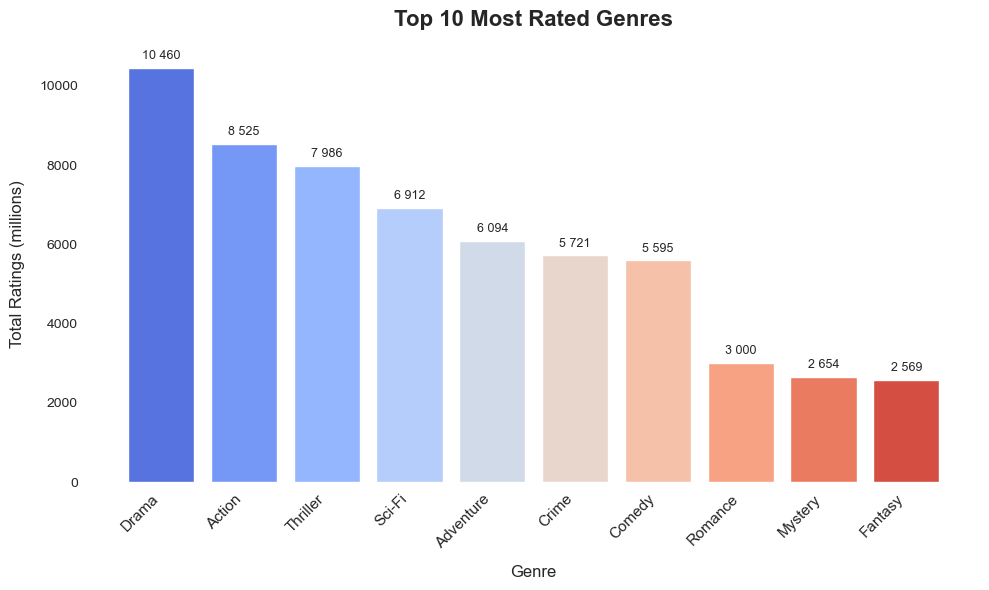

In [76]:
sns.set_style("white")
plt.figure(figsize=(10, 6))

bars = plt.bar(
    df_genres_pd["genres"],
    df_genres_pd["total_ratings"] / 1e6,
    color=sns.color_palette("coolwarm", len(df_genres_pd)),
    edgecolor="white",
    linewidth=1
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 150,
        f"{int(height):,}".replace(",", " "),
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="medium"
    )

plt.title("Top 10 Most Rated Genres", fontsize=16, weight="bold", pad=15)
plt.xlabel("Genre", fontsize=12, labelpad=10)
plt.ylabel("Total Ratings (millions)", fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()




### **Insight**

From the visualization, it becomes evident that **Drama** stands out as the most popular genre, 
accumulating the highest number of ratings overall. **Action** and **Thriller** follow closely, 
reflecting their sustained audience engagement and mainstream appeal.  
Genres such as **Romance**, **Mystery**, and **Fantasy** appear with significantly fewer ratings, 
suggesting a more niche audience or less frequent interaction from users.


## 🎯 Question 2 — What are the highest rated genres?

After understanding which genres receive the largest number of ratings — representing *popularity* — 
we now shift the focus to **quality perception**.  
In this step, we aim to identify which genres achieve the **highest average ratings**, 
revealing users’ most appreciated types of movies.

This analysis highlights genres that, although possibly less mainstream, 
tend to receive consistently higher evaluations from users.


In [77]:
df_genres_avg = (
    df_moviedetails_exploded
    .group_by("genres")
    .agg([
        pl.col("average_rating").mean().alias("avg_rating"),
        pl.len().alias("n_movies")
    ])
    .sort("avg_rating", descending=True)
    .head(10)
)
df_genres_avg_pd = df_genres_avg.to_pandas()
df_genres_avg_pd


,genres,avg_rating,n_movies
0,Documentary,3.339721,9363
1,Film-Noir,3.322674,353
2,IMAX,3.236715,195
3,Musical,3.193193,1059
4,War,3.173634,2325
5,Drama,3.116606,34175
6,Romance,3.090371,10369
7,Animation,3.058072,4617
8,Crime,3.022689,6976
9,Comedy,2.985681,23124


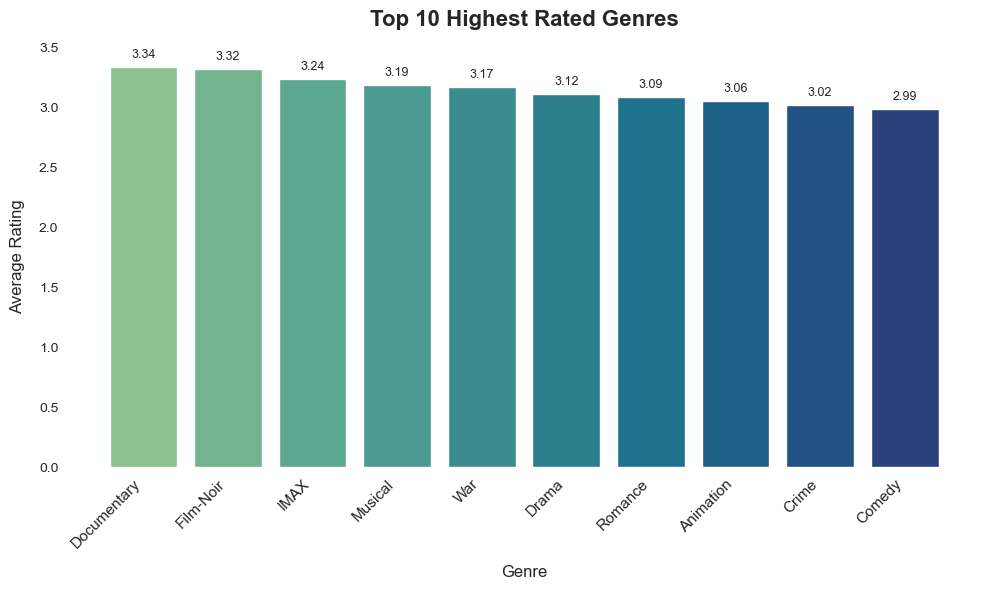

In [78]:
sns.set_style("white")
plt.figure(figsize=(10, 6))

bars = plt.bar(
    df_genres_avg_pd["genres"],
    df_genres_avg_pd["avg_rating"],
    color=sns.color_palette("crest", len(df_genres_avg_pd)),
    edgecolor="white",
    linewidth=1
)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.05,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="medium"
    )

plt.title("Top 10 Highest Rated Genres", fontsize=16, weight="bold", pad=15)
plt.xlabel("Genre", fontsize=12, labelpad=10)
plt.ylabel("Average Rating", fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


### **Insight**

The results indicate that genres such as **Documentary**, **Film-Noir**, and **IMAX** receive the highest average ratings, 
suggesting that audiences tend to value films that offer more artistic or immersive experiences.  
These genres, while not necessarily the most popular, often appeal to niche viewers and are appreciated for their 
depth, realism, or technical quality.

On the other hand, genres like **Comedy** and **Crime**, despite being widely watched, tend to have slightly lower 
average ratings. This could be explained by the diversity of audience expectations and the greater variability 
in the quality of productions within these categories.


## 🎬 Question 3 — How do genres relate to popularity and quality?

Having analyzed which genres are *most rated* and *highest rated* separately,  we now combine both perspectives to explore whether **popularity correlates with quality**.

This analysis investigates if genres that attract more audience engagement (measured by total number of ratings) are also those that receive higher average ratings — or if niche genres tend to be better rated despite having fewer viewers.


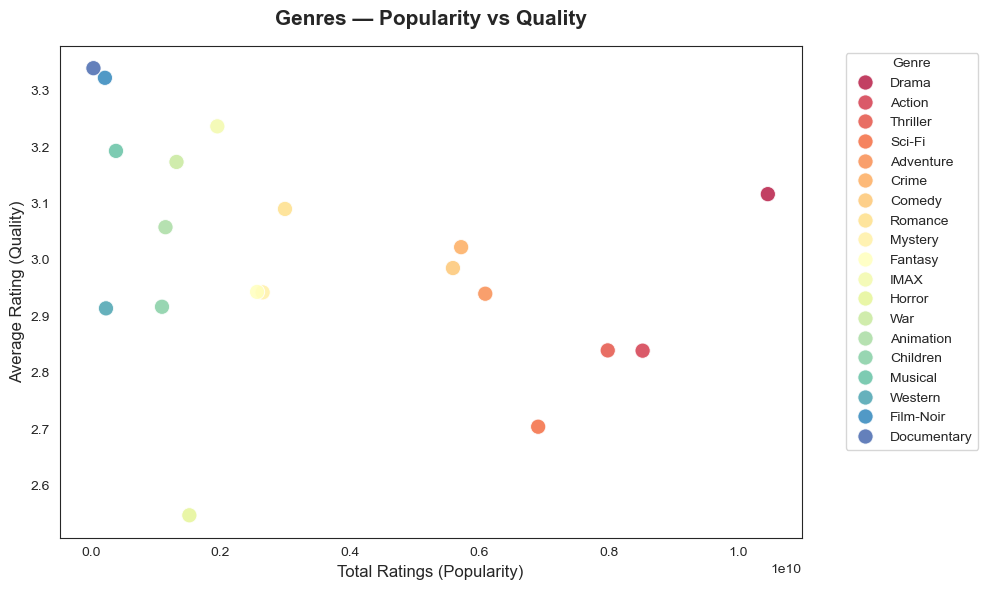

In [79]:

df_scatter = df_moviedetails_exploded.to_pandas()

genre_summary = (
    df_scatter.groupby("genres", as_index=False)
    .agg({
        "average_rating": "mean",
        "rating_count": "sum"
    })
    .sort_values("rating_count", ascending=False)
)

plt.figure(figsize=(10, 6))
sns.set_style("white")

sns.scatterplot(
    data=genre_summary,
    x="rating_count",
    y="average_rating",
    hue="genres",
    s=120,
    palette="Spectral",
    alpha=0.85,
    edgecolor="white",
    linewidth=0.7
)

plt.title("Genres — Popularity vs Quality", fontsize=15, weight="bold", pad=15)
plt.xlabel("Total Ratings (Popularity)", fontsize=12)
plt.ylabel("Average Rating (Quality)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Genre")
plt.grid(False)
plt.tight_layout()
plt.show()


### **Insight**

The visualization clearly shows that the relationship between popularity and quality is weak or even inverse.  
Genres such as **Drama**, **Action**, and **Comedy** attract the largest audiences and therefore accumulate the highest number of ratings — yet their **average ratings hover around 3.0**, suggesting a more mixed audience perception.  

Conversely, genres like **Documentary**, **Film-Noir**, and **IMAX** receive **fewer ratings overall** but stand out with **higher average scores**, indicating that these genres appeal to smaller, more appreciative audiences.  

In short, **popular genres are not necessarily the best rated**, and niche genres tend to deliver higher satisfaction among viewers.


## 🎞️ Question 4 — How have movie ratings evolved over time?

After exploring popularity and genre preferences,  it’s important to examine the **temporal evolution of ratings** —  to understand whether audience behavior and film appreciation have changed over the years.

This analysis aims to uncover **trends in average movie ratings over time**,  helping us identify periods of higher or lower audience satisfaction and potential shifts in rating culture.


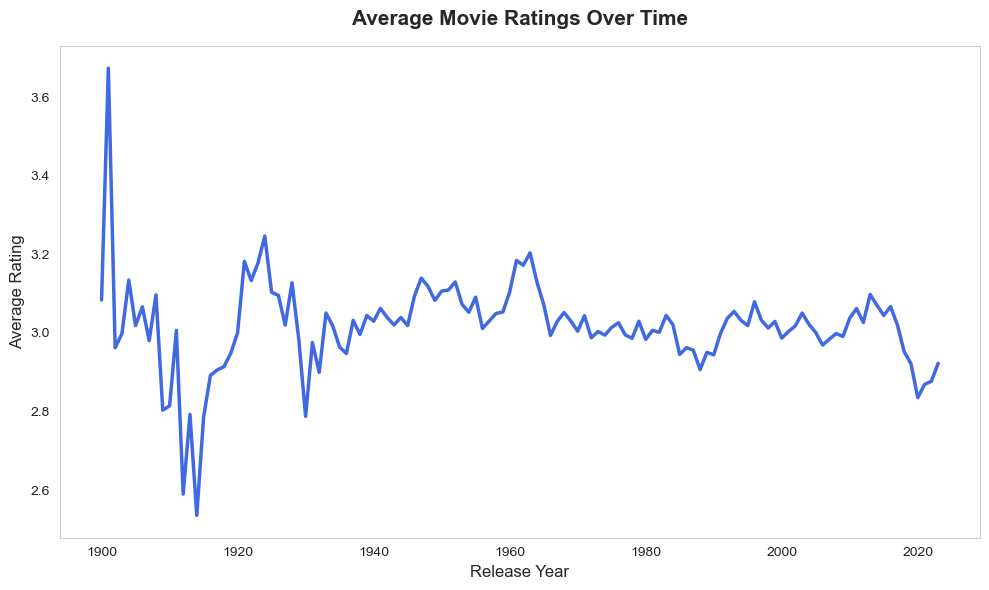

In [80]:
df_time = df_moviedetails.to_pandas()

df_time = df_time[(df_time['year'] >= 1900) & (df_time['year'] <= 2025)]

ratings_over_time = (
    df_time.groupby('year', as_index=False)
    .agg({'average_rating': 'mean', 'rating_count': 'sum'})
)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.lineplot(
    data=ratings_over_time,
    x='year',
    y='average_rating',
    color='royalblue',
    linewidth=2.5
)

plt.title("Average Movie Ratings Over Time", fontsize=15, weight='bold', pad=15)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


### **Insight**

The trend over time shows that average movie ratings have fluctuated across decades,  with early cinema (pre-1930) showing strong variation — likely due to fewer films and a selective rating base.  

From the **1950s to the 2000s**, ratings appear to stabilize around **3.0 to 3.2**, suggesting  a period of consistent audience perception and more balanced evaluation across genres and styles.  

In the **most recent years**, a slight decline is visible, possibly reflecting a **larger and more diverse rating population**, the **rise of streaming platforms**,  
and the **increased volume of movie production**, which tends to dilute extreme ratings.  

Overall, while audience behavior evolves, the long-term average remains stable, indicating a relatively consistent perception of film quality through time.


## 🌍 Question 5 — How have movie genres evolved over decades?

After exploring which genres are most popular and highest rated,  we now turn to a **temporal perspective** — examining how different genres have evolved in terms of their **average ratings and audience engagement** across decades.  

This question allows us to identify **cultural and cinematic trends** — how preferences shifted from classic dramas to action-packed blockbusters or sci-fi adventures, and whether these shifts align with **technological progress or historical events**.  

By analyzing long-term trends, we can gain insight into how cinema reflects society’s evolving interests, values, and global circumstances.


In [81]:

df_moviedetails = df_moviedetails.with_columns(
    (pl.col("year") // 10 * 10).alias("decade")
)


df_genre_trends = (
    df_moviedetails
    .with_columns(pl.col("genres").str.split("|"))
    .explode("genres")
    .group_by(["decade", "genres"])
    .agg([
        pl.col("average_rating").mean().alias("average_rating"),
        pl.col("rating_count").sum().alias("total_ratings")
    ])
    .sort(["genres", "decade"])
)


df_genre_trends = df_genre_trends.to_pandas()

selected_genres = ["Drama", "Comedy", "Action", "Thriller", "Romance"]


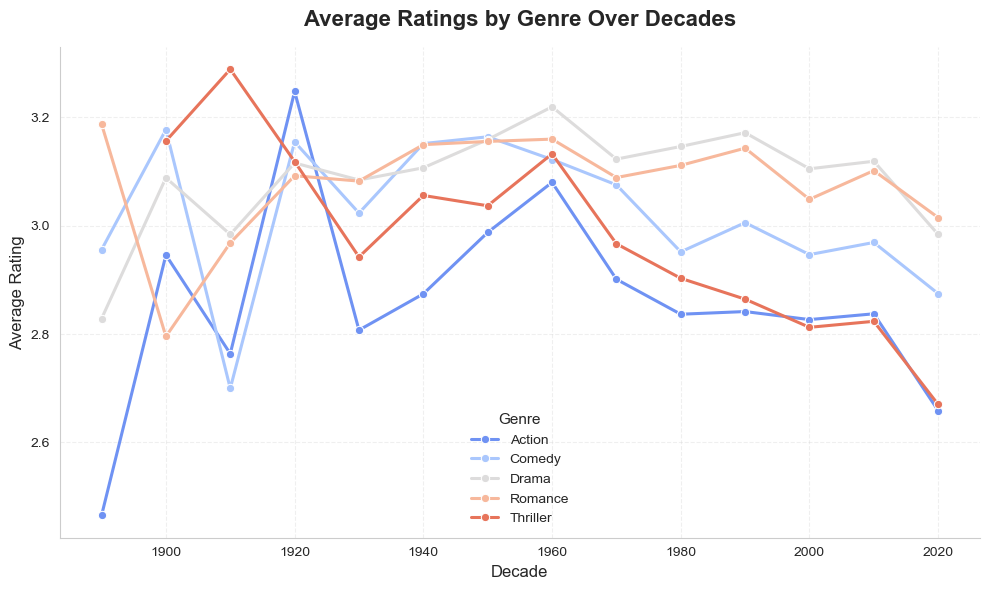

In [82]:

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

palette = sns.color_palette("coolwarm", 5)

sns.lineplot(
    data=df_genre_trends[df_genre_trends["genres"].isin(selected_genres)],
    x="decade", y="average_rating", hue="genres",
    marker="o", linewidth=2.2, palette=palette
)

plt.title("Average Ratings by Genre Over Decades", fontsize=16, weight="bold", pad=15)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Genre", title_fontsize=11, fontsize=10, frameon=False)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()

sns.despine()

plt.show()




### **Insight**

The evolution of average ratings across decades reveals interesting long-term patterns.  
Genres such as **Drama** and **Comedy** have remained relatively stable, maintaining consistent audience appreciation over time.  
Meanwhile, **Action** films show a rise in ratings during the late 20th century — reflecting the technological boom in filmmaking and the rise of blockbuster culture after the 1980s.  

On the other hand, **War** movies present sporadic peaks, often coinciding with or following real-world conflicts (e.g., post–World War II and the early 2000s after the 9/11 attacks), suggesting that global events may subtly influence audience interest in certain genres.  

Overall, while tastes and production styles evolve, cinema’s core genres continue to resonate with audiences, each adapting to the social and cultural context of its time.


### 🎯 **Question 6 — Who are the most active reviewers?**

To explore user engagement, we identify the users who have contributed the **highest number of movie ratings**.  
This helps us understand participation dynamics within the platform — whether user activity is evenly distributed or concentrated among a few highly active individuals.  
Such insights reveal how much influence certain users might have over global trends and the perception of movie popularity or quality.



/var/folders/bf/tj6bjgvd40ngmp7l_dkht6bc0000gn/T/ipykernel_38965/192441780.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_user_activity, x="userId", y="n_ratings", palette=palette)


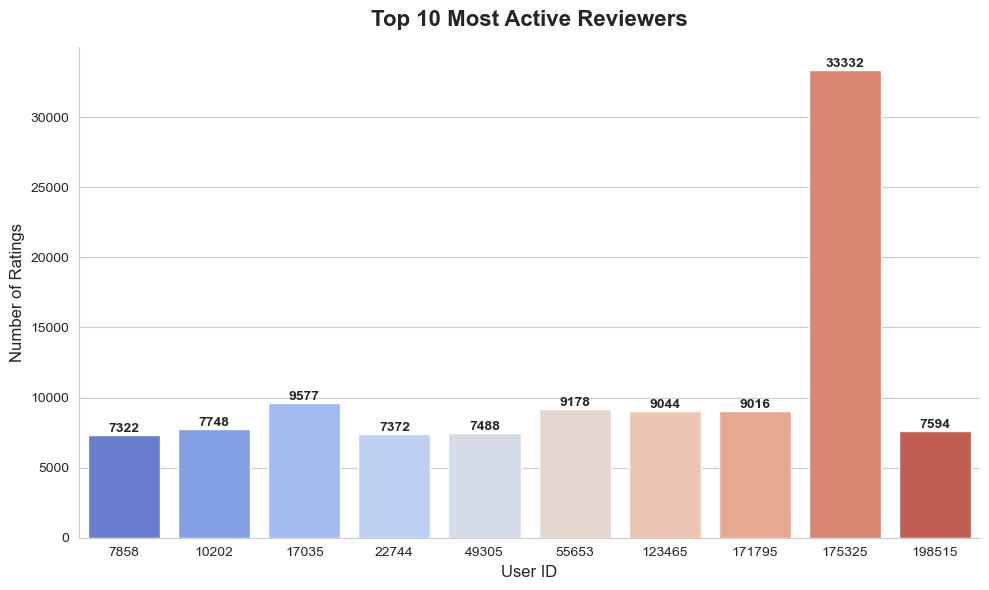

In [83]:

df_ratings = df_ratings.to_pandas() if not isinstance(df_ratings, pd.DataFrame) else df_ratings

df_user_activity = (
    df_ratings
    .groupby("userId", as_index=False)
    .agg(n_ratings=("rating", "count"), avg_rating=("rating", "mean"))
    .sort_values(by="n_ratings", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", len(df_user_activity))

bars = sns.barplot(data=df_user_activity, x="userId", y="n_ratings", palette=palette)

for bar in bars.patches:
    bars.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 10,
        f"{int(bar.get_height())}",
        ha='center', va='bottom', fontsize=10, weight='bold'
    )

plt.title("Top 10 Most Active Reviewers", fontsize=16, weight="bold", pad=15)
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()



### 🧠 **Insight — User Engagement Distribution**

The analysis of user activity shows a **highly uneven distribution of participation**.  
While most of the top reviewers contributed between **7,000 and 9,500 ratings**, one user stands out with more than **33,000 reviews** — over three times higher than any other.  

This highlights the presence of **super-reviewers**, whose behavior significantly shapes overall averages and genre visibility.  
Such users often represent **dedicated, long-term contributors**, but they can also introduce **rating bias** if their preferences dominate the dataset.  

Recognizing this imbalance is essential for improving **recommendation fairness**, **community management**, and ensuring that platform insights reflect the opinions of the wider audience rather than a small subset of extremely active users.


### 🎭 **Question 7 — Do the most active users tend to give higher or lower ratings?**

Building on the previous analysis of reviewer activity, we now explore whether **user engagement correlates with rating behavior**.  
Specifically, we examine if users who rate more movies tend to be **more generous or more critical** in their evaluations.  

Understanding this relationship helps assess potential **bias in rating distributions** — for instance, whether a small number of highly active users might systematically **inflate or deflate overall averages**, influencing how movies are perceived across the platform.  
This analysis provides insight into the **consistency, subjectivity, and reliability** of crowd-based movie evaluations.


/var/folders/bf/tj6bjgvd40ngmp7l_dkht6bc0000gn/T/ipykernel_38965/2689183370.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


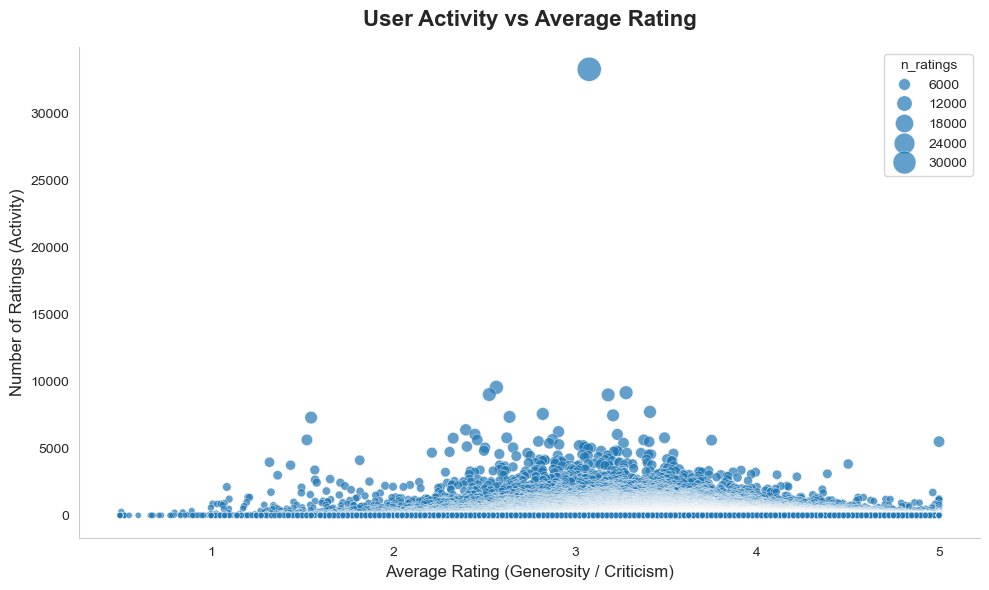

In [84]:
df_user_bias = (
    df_ratings
    .groupby("userId", as_index=False)
    .agg(n_ratings=("rating", "count"), avg_rating=("rating", "mean"))
)

df_user_bias = df_user_bias.sort_values(by="n_ratings", ascending=False)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=df_user_bias,
    y="n_ratings",
    x="avg_rating",
    size="n_ratings",
    sizes=(20, 300),
    alpha=0.7,
    palette="coolwarm"
)

plt.title("User Activity vs Average Rating", fontsize=16, weight="bold", pad=15)
plt.ylabel("Number of Ratings (Activity)", fontsize=12)
plt.xlabel("Average Rating (Generosity / Criticism)", fontsize=12)
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


### 🧠 **Insight — Relationship Between Activity and Rating Behavior**

The scatter plot reveals a clear **concentration of users with few ratings**, most clustering around an **average score between 2.5 and 4.0**.  
This indicates that the majority of users engage casually, rating only a handful of movies while maintaining similar scoring patterns.  

Interestingly, even the **most active reviewers** — those who have rated thousands of movies — do not deviate significantly from this central trend.  
Their average ratings remain close to the overall mean, suggesting that **high activity does not necessarily imply higher generosity or greater criticism**.  

In other words, **user activity is largely independent of rating bias**.  
While a few outliers exist, the overall stability of averages across activity levels indicates a **balanced and consistent evaluation culture** within the platform’s user base.



### 🎞️ Question 8 — Do Longer Movies Receive Higher or Lower Ratings?

To go beyond the information contained in the MovieLens dataset, we decided to **integrate an external data source** — the official **IMDb “title.basics” dataset** (via Kaggle).  
This addition allowed us to enrich our analysis with each movie’s **runtime (in minutes)**, enabling a deeper look at whether the *length of a film* influences its *audience rating*.

This step demonstrates the value of **cross-dataset enrichment** in data analysis — combining user behavior (MovieLens) with descriptive metadata (IMDb) to uncover relationships that wouldn’t be visible otherwise.

Our goal:  
Explore whether longer films tend to receive higher or lower ratings on average, and identify if there is an “ideal” duration range for audience appreciation.




In [85]:
imdb_df = pd.read_csv("data/title.basics.tsv", sep="\t", low_memory=False)

print(imdb_df.columns)
imdb_df.head()

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


Doing the import using polars is faster

In [32]:
imdb_df_1 = pl.read_csv(
    "data/title.basics.tsv",
    separator="\t", null_values="\\N",quote_char=None

)
imdb_df_1.head()

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
str,str,str,str,i64,i64,str,i64,str
"""tt0000001""","""short""","""Carmencita""","""Carmencita""",0,1894,null,1,"""Documentary,Short"""
"""tt0000002""","""short""","""Le clown et ses chiens""","""Le clown et ses chiens""",0,1892,null,5,"""Animation,Short"""
"""tt0000003""","""short""","""Poor Pierrot""","""Pauvre Pierrot""",0,1892,null,5,"""Animation,Comedy,Romance"""
"""tt0000004""","""short""","""Un bon bock""","""Un bon bock""",0,1892,null,12,"""Animation,Short"""
"""tt0000005""","""short""","""Blacksmith Scene""","""Blacksmith Scene""",0,1893,null,1,"""Short"""


## **3. Initial Data Profiling - Understading the data**

On the previous chapter the files that compose the dataset for analysis were loaded. 
In this chapter the main goal is to understand the data available in each table and connect them.

### **3.1. Movies**

Movies table has the  Movieid, Title and the movie Genres. Looking for the first lines it is possible to understand that some titles have also the movie year and the genres columns has multiple values listed splited by "|". Both of this values will require treatment for analysis.
There are 87 585 movies on this dataframe.

In [48]:
df_movies.head(10)

movieId,title,genres
i64,str,str
1,"""Toy Story (1995)""","""Adventure|Animation|Children|C…"
2,"""Jumanji (1995)""","""Adventure|Children|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama|Romance"""
5,"""Father of the Bride Part II (1…","""Comedy"""
6,"""Heat (1995)""","""Action|Crime|Thriller"""
7,"""Sabrina (1995)""","""Comedy|Romance"""
8,"""Tom and Huck (1995)""","""Adventure|Children"""
9,"""Sudden Death (1995)""","""Action"""


In [31]:
df_movies.shape

(87585, 3)

#### **3.1.1. Genres Treatment - transforming "(no genres listed)" into nulls** 

There are movies with the genre set as "(no genres listed)" - this will be turned into nulls.

In [49]:
df_movies = df_movies.with_columns(
    pl.col("genres").replace("(no genres listed)", None)
)

df_movies.head()

movieId,title,genres
i64,str,str
1,"""Toy Story (1995)""","""Adventure|Animation|Children|C…"
2,"""Jumanji (1995)""","""Adventure|Children|Fantasy"""
3,"""Grumpier Old Men (1995)""","""Comedy|Romance"""
4,"""Waiting to Exhale (1995)""","""Comedy|Drama|Romance"""
5,"""Father of the Bride Part II (1…","""Comedy"""


#### **3.1.2. Duplicate analysis**

The dataset has 401 movies identified with the exact same title, which at this point is composed by the name and te year.

In [50]:
duplicated_movies = df_movies.filter(pl.col("title").is_duplicated())
print(f"Number of movies with the same title: {len(duplicated_movies)}")

Number of movies with the same title: 401


In [ ]:
#Check some examples of duplicated titles
duplicated_movies.sort("title", descending=True)


movieId,title,genres
i64,str,str
184301,"""Yellow (2006)""","""Drama|Romance"""
274159,"""Yellow (2006)""",null
195275,"""White Lily (2016)""","""Drama|Sci-Fi"""
216597,"""White Lily (2016)""","""Drama"""
91199,"""Weekend (2011)""","""Drama|Romance"""
…,…,…
151797,"""Absolution (2015)""","""Drama|Thriller"""
96456,"""ATM (2012)""","""Horror|Thriller"""
217057,"""ATM (2012)""","""Comedy|Romance"""


After a quick search on IMBD we can conclude that although the name and year are the same, the lines correspondent to different movies.
For instance the first example, regarding Yellow (2006), there is a movie and also a short with the same name. The same was found for White Lily (2016). 

#### **3.1.3. Titles - spliting the year**

The titles in most cases have the actual title and the movie year. The first step is to split both of this informations. 

In [63]:
df_movies_1 = df_movies.with_columns([
    # Extract year, the 4 numbers inside the "". If no year is found it will be null
    pl.col("title").str.extract(r'\((\d{4})\)', 1).cast(pl.Int64).alias("year"),
    # Remove year from title (removes the pattern " (YYYY)" or "(YYYY)")
    pl.col("title").str.replace(r'\s*\(\d{4}\)', '').str.strip_chars('"').alias("title")
])

In [ ]:
df_movies_1.head()

movieId,title,genres,year
i64,str,str,i64
1,"""Toy Story""","""Adventure|Animation|Children|C…",1995
2,"""Jumanji""","""Adventure|Children|Fantasy""",1995
3,"""Grumpier Old Men""","""Comedy|Romance""",1995
4,"""Waiting to Exhale""","""Comedy|Drama|Romance""",1995
5,"""Father of the Bride Part II""","""Comedy""",1995


After the split the year from the title we can conclude that there are 615 movies without that data.

In [64]:
df_movies_1.null_count()

movieId,title,genres,year
u32,u32,u32,u32
0,0,7080,615


#### **3.1.4. Titles - spliting the genres**

Since a movie has multiple genres the funcion explode will be used to split them.

In [68]:
df_movies_exploded = (
    df_movies_1
    .with_columns(pl.col("genres").str.split("|"))
    .explode("genres")
    .rename({"genres": "genre"})  # renomear diretamente
    .select(["movieId", "title", "year", "genre"])
    .filter(pl.col("genre").is_not_null() & (pl.col("genre") != ""))
)

df_movies_exploded.head()

movieId,title,year,genre
i64,str,i64,str
1,"""Toy Story""",1995,"""Adventure"""
1,"""Toy Story""",1995,"""Animation"""
1,"""Toy Story""",1995,"""Children"""
1,"""Toy Story""",1995,"""Comedy"""
1,"""Toy Story""",1995,"""Fantasy"""


In [52]:
# Connect to DuckDB (in-memory or to a file)
con = duckdb.connect(database=":memory:")

# Define the file path, in this case data folder
movies_path = "data/movies_32m.parquet"

# SQL statement
querymovies = f"""
SELECT count (*) as total_movies
FROM read_parquet('{movies_path}')
"""

# Execute the query and fetch results as a Polars DataFrame
df_pl_query_movies = con.execute(querymovies).pl()

print(type(df_pl_query_movies))
print(df_pl_query_movies.head())

<class 'polars.dataframe.frame.DataFrame'>
shape: (1, 1)
┌──────────────┐
│ total_movies │
│ ---          │
│ i64          │
╞══════════════╡
│ 87585        │
└──────────────┘


### **3.2. Ratings**

Ratings table has more than 32 million registers. 

In [57]:
df_ratings.shape

(32000204, 4)

In [58]:
df_ratings.head()

userId,movieId,rating,timestamp
i64,i64,f64,i64
1,17,4.0,944249077
1,25,1.0,944250228
1,29,2.0,943230976
1,30,5.0,944249077
1,32,5.0,943228858


According with dataset source, the Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


In [59]:
# Convert the 'timestamp' column to datetime and create a new column 'date'
df_ratings = df_ratings.with_columns(
    (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("datetime")
)

# The * by 1000 is because the original timestamp is in seconds, and we need milliseconds for polars

df_ratings.head()

userId,movieId,rating,timestamp,datetime
i64,i64,f64,i64,datetime[ms]
1,17,4.0,944249077,1999-12-03 19:24:37
1,25,1.0,944250228,1999-12-03 19:43:48
1,29,2.0,943230976,1999-11-22 00:36:16
1,30,5.0,944249077,1999-12-03 19:24:37
1,32,5.0,943228858,1999-11-22 00:00:58


### **3.3. Links**

In [61]:
df_links.head()

movieId,imdbId,tmdbId
i64,str,i64
1,"""0114709""",862
2,"""0113497""",8844
3,"""0113228""",15602
4,"""0114885""",31357
5,"""0113041""",11862


In [62]:
df_movies.shape

(87585, 3)

### **3.4. Tags**

In [60]:
df_tags.head()

userId,movieId,tag,timestamp
i64,i64,str,i64
22,26479,"""Kevin Kline""",1583038886
22,79592,"""misogyny""",1581476297
22,247150,"""acrophobia""",1622483469
34,2174,"""music""",1249808064
34,2174,"""weird""",1249808102


In [ ]:
# Convert the 'timestamp' column to datetime and create a new column 'date'
df_tags= df_tags.with_columns(
    (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("datetime")
)

# The * by 1000 is because the original timestamp is in seconds, and we need milliseconds for polars

df_tags.head()

### **3.1. Cross Analysis: Querying using Athena**

In order to perform the analysis indicated previously but with the 32m registers from ratings database, it was necessary to perform the query recurring to AWS Athena.
The results of the query were downloaded to CSV, added on this repository / project uder the name "moviedetails.csv".

This query was very heavy to run locally, after 20 minutes it was decided to use powerfull methods to run it.
The joins made, mainly to the ratings table are the reason for it.

This, dataframe, allows us to have an average rating per movie and the count of ratings made per each. Also the count of tags per movie and the number of different users that have evaluated it. 


In [54]:
import polars as pl
from pyathena import connect
from pyathena.arrow.cursor import ArrowCursor
from dotenv import load_dotenv

#Load the environment variables from the .env file, where the AWS credentials are stored
load_dotenv()

DATABASE = "bdf_25_7_ml_32m"

# Connect with ArrowCursor because it is more efficient for large datasets
with connect(
    s3_staging_dir='s3://bdf-25-7/queries-ml-32-m/',
    region_name='us-east-1',
    cursor_class=ArrowCursor
).cursor() as cursor:
    
    query = f"""
    SELECT 
        bdf_25_7_ml_32m.movies.movieId, 
        bdf_25_7_ml_32m.movies.title, 
        bdf_25_7_ml_32m.movies.genres, 
        AVG(bdf_25_7_ml_32m.ratings.rating) AS average_rating, 
        COUNT(bdf_25_7_ml_32m.ratings.rating) AS rating_count,
        COUNT(bdf_25_7_ml_32m.tag.movieId) as tag_count_per_movie, 
        COUNT(DISTINCT bdf_25_7_ml_32m.ratings.userId) as user_count_per_movie
    FROM bdf_25_7_ml_32m.movies
    LEFT JOIN bdf_25_7_ml_32m.ratings ON bdf_25_7_ml_32m.movies.movieId = bdf_25_7_ml_32m.ratings.movieId
    LEFT JOIN bdf_25_7_ml_32m.tag ON bdf_25_7_ml_32m.movies.movieId = bdf_25_7_ml_32m.tag.movieId
    GROUP BY bdf_25_7_ml_32m.movies.movieId, bdf_25_7_ml_32m.movies.title, bdf_25_7_ml_32m.movies.genres
    """

    cursor.execute(query)
    
    # Use as_arrow() instead of fetch_arrow_table()
    arrow_table = cursor.as_arrow()
    df = pl.from_arrow(arrow_table)



shape: (5, 7)
┌─────────┬──────────────┬──────────────┬──────────────┬──────────────┬──────────────┬─────────────┐
│ movieId ┆ title        ┆ genres       ┆ average_rati ┆ rating_count ┆ tag_count_pe ┆ user_count_ │
│ ---     ┆ ---          ┆ ---          ┆ ng           ┆ ---          ┆ r_movie      ┆ per_movie   │
│ i64     ┆ str          ┆ str          ┆ ---          ┆ i64          ┆ ---          ┆ ---         │
│         ┆              ┆              ┆ f64          ┆              ┆ i64          ┆ i64         │
╞═════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪═════════════╡
│ 20      ┆ Money Train  ┆ Action|Comed ┆ 2.871458     ┆ 589922       ┆ 589922       ┆ 4306        │
│         ┆ (1995)       ┆ y|Crime|Dram ┆              ┆              ┆              ┆             │
│         ┆              ┆ a|Thri…      ┆              ┆              ┆              ┆             │
│ 171     ┆ Jeffrey      ┆ Comedy|Drama ┆ 3.593487     ┆ 27132        ┆ 27132

Due to the connection requirements etc the data was saved directly on a csv, available on this project under the name moviedetails.  The next cell is imports that same file to a df and will be used later.

In [109]:
#the cvs is on this folder and its called moviedetails csv
df_moviedetails = pl.read_csv("moviedetails.csv")
print("CSV read successfully. Shape:", df_moviedetails.shape)
display(df_moviedetails .head())

CSV read successfully. Shape: (87585, 7)


movieId,title,genres,average_rating,rating_count,tag_count_per_movie,user_count_per_movie
i64,str,str,f64,i64,i64,i64
20,"""Money Train (1995)""","""Action|Comedy|Crime|Drama|Thri…",2.871458,589922,589922,4306
171,"""Jeffrey (1995)""","""Comedy|Drama""",3.593487,27132,27132,1428
315,"""Specialist, The (1994)""","""Action|Drama|Thriller""",2.893674,102717,102717,11413
331,"""Tom & Viv (1994)""","""Drama""",3.289855,1656,1656,552
386,"""S.F.W. (1994)""","""Drama""",2.822281,5655,5655,377


#### **3.1.1. Top 10 movies by average rating**

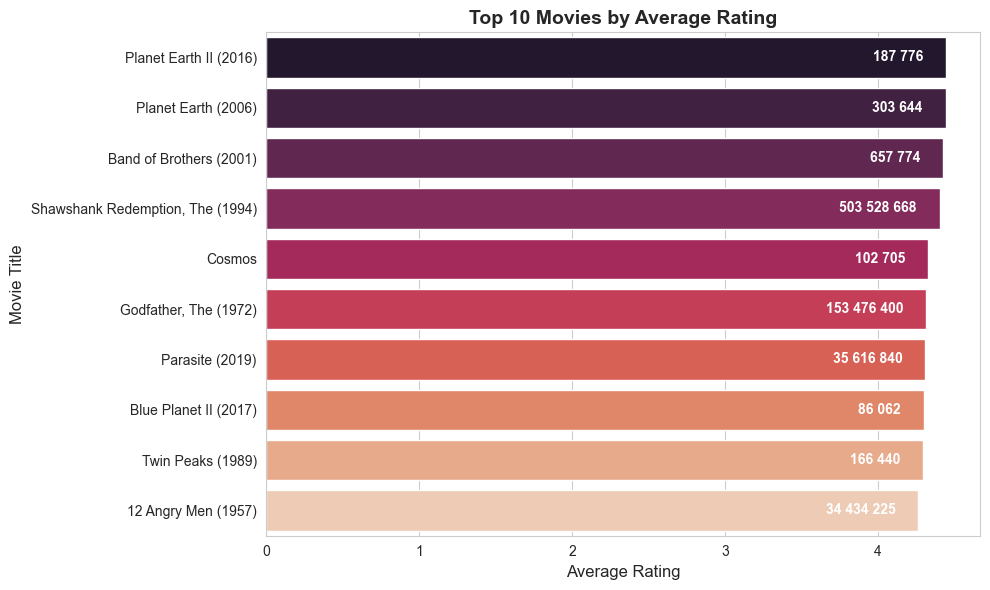

In [108]:
top10_pl = (
    df
    .filter(pl.col("rating_count") > 10000)
    .sort("average_rating", descending=True)
    .select(["title", "average_rating", "rating_count"])
    .head(10)
)

top10_pd = pd.DataFrame({
    'title': top10_pl['title'].to_list(),
    'average_rating': top10_pl['average_rating'].to_list(),
    'rating_count': top10_pl['rating_count'].to_list()
})

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=top10_pd,
    x='average_rating',
    y='title',
    hue='title',
    palette='rocket',
    legend=False,
    ax=ax
)

# Add the count of ratings inside the bars
for i, (rating, count) in enumerate(zip(top10_pd['average_rating'], top10_pd['rating_count'])):
    ax.text(
        rating - 0.15, 
        i, 
        f"{count:,}".replace(",", " "),  
        va='center', 
        ha='right',   
        fontsize=10,
        color='white',  
        fontweight='bold'
    )

ax.set_xlabel('Average Rating', fontsize=12)
ax.set_ylabel('Movie Title', fontsize=12)
ax.set_title('Top 10 Movies by Average Rating', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 🧩 **4. Exploratory Data Analysis & Visual Insights**

This section brings together the main findings from the analysis of the MovieLens 32M dataset, combining exploratory and temporal perspectives to understand what drives user ratings and how global events may influence viewing patterns.
Each subsection follows the same structure:
* A data-driven question that guides the analysis;
* The SQL or Polars query used to extract and transform the data;
* A visualization that illustrates the results;
* A brief interpretation summarizing the main takeaway.

We began by examining which factors explain higher ratings, focusing on genre, popularity, and user behavior. This exploratory analysis looks at how ratings vary by genre, how the number of ratings relates to perceived quality, and whether highly active users evaluate films differently from casual ones.
The study then extends to a temporal dimension, analysing how user engagement and film preferences evolved during key global events. Two case studies were chosen:
The COVID-19 pandemic (declared March 11, 2020), to explore whether confinement and increased screen time affected the volume or sentiment of ratings.
The war in Ukraine (beginning February 24, 2022), to assess whether audiences showed increased interest in War and Documentary films during and after the conflict.
Together, these analyses connect user-level behaviour with larger social contexts, revealing how intrinsic factors — such as genre and popularity — consistently shape evaluations, while external events can briefly shift what audiences choose to watch without fundamentally changing how they rate films.


### 🎭 Question 1 — What are the most popular genres?

We start by identifying which genres receive the **highest number of ratings**.
This indicates popularity and audience engagement across the platform.


In [27]:
df_genres = (
    df_moviedetails
    .with_columns(
        pl.col("genres").str.split("|")  
    )
    .explode("genres")  
    .group_by("genres")
    .agg([
        pl.col("rating_count").sum().alias("total_ratings"), 
        pl.col("average_rating").mean().alias("avg_rating")   
    ])
    .sort("total_ratings", descending=True)
    .head(10)  
)


In [28]:
df_genres_pd = df_genres.to_pandas()


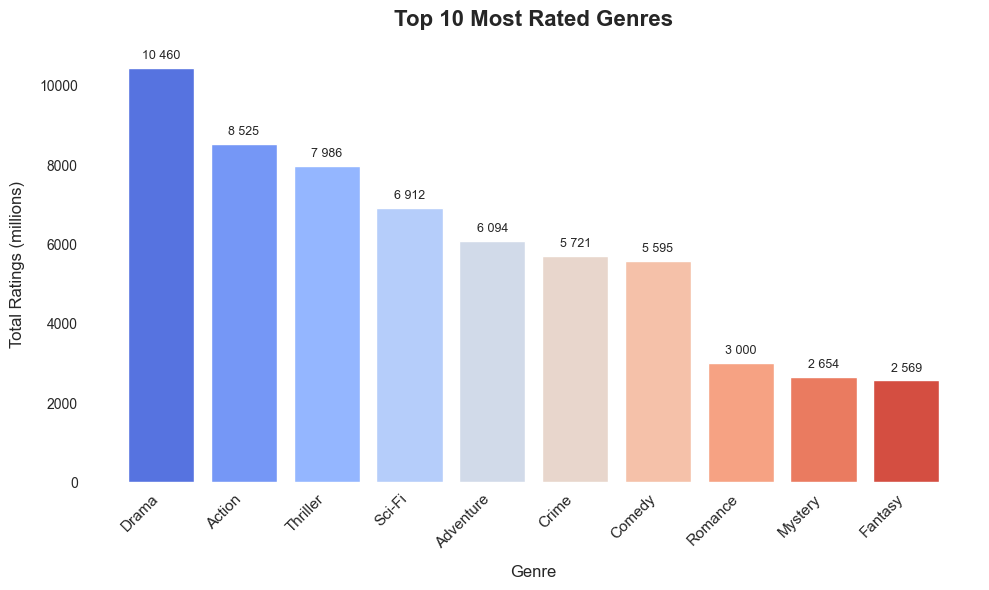

In [29]:
sns.set_style("white")
plt.figure(figsize=(10, 6))

bars = plt.bar(
    df_genres_pd["genres"],
    df_genres_pd["total_ratings"] / 1e6,
    color=sns.color_palette("coolwarm", len(df_genres_pd)),
    edgecolor="white",
    linewidth=1
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 150,
        f"{int(height):,}".replace(",", " "),
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="medium"
    )

plt.title("Top 10 Most Rated Genres", fontsize=16, weight="bold", pad=15)
plt.xlabel("Genre", fontsize=12, labelpad=10)
plt.ylabel("Total Ratings (millions)", fontsize=12, labelpad=10)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()




### **Insight**

From the visualization, it becomes evident that **Drama** stands out as the most popular genre, 
accumulating the highest number of ratings overall. **Action** and **Thriller** follow closely, 
reflecting their sustained audience engagement and mainstream appeal.  
Genres such as **Romance**, **Mystery**, and **Fantasy** appear with significantly fewer ratings, 
suggesting a more niche audience or less frequent interaction from users.


## 🎯 Question 2 — What are the highest rated genres?

After understanding which genres receive the largest number of ratings — representing *popularity* — 
we now shift the focus to **quality perception**.  
In this step, we aim to identify which genres achieve the **highest average ratings**, 
revealing users’ most appreciated types of movies.

This analysis highlights genres that, although possibly less mainstream, 
tend to receive consistently higher evaluations from users.


In [30]:
df_genres_avg = (
    df_moviedetails_exploded
    .group_by("genres")
    .agg([
        pl.col("average_rating").mean().alias("avg_rating"),
        pl.len().alias("n_movies")
    ])
    .sort("avg_rating", descending=True)
    .head(10)
)
df_genres_avg_pd = df_genres_avg.to_pandas()
df_genres_avg_pd


,genres,avg_rating,n_movies
0,Documentary,3.339721,9363
1,Film-Noir,3.322674,353
2,IMAX,3.236715,195
3,Musical,3.193193,1059
4,War,3.173634,2325
5,Drama,3.116606,34175
6,Romance,3.090371,10369
7,Animation,3.058072,4617
8,Crime,3.022689,6976
9,Comedy,2.985681,23124


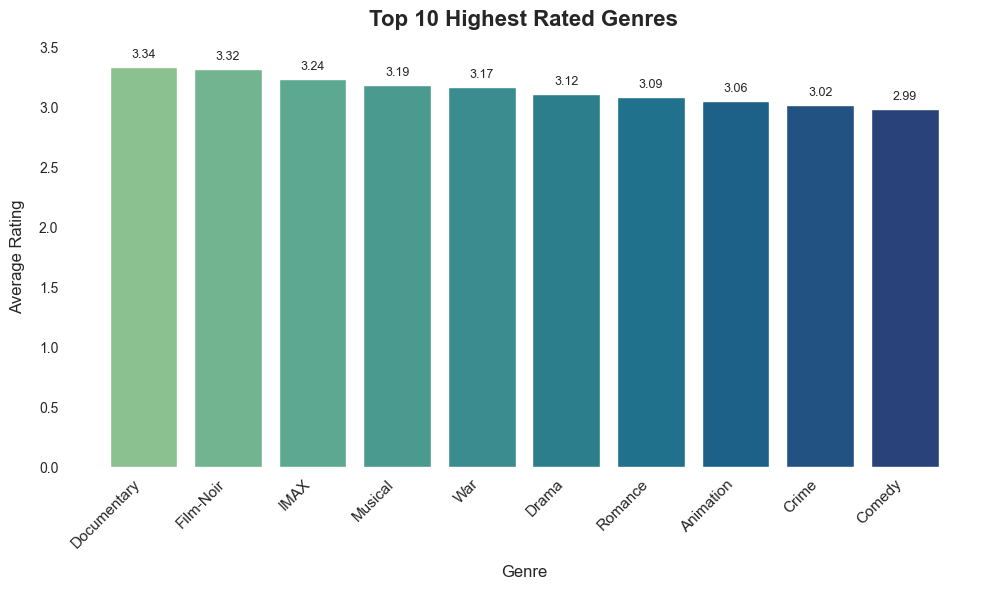

In [31]:
sns.set_style("white")
plt.figure(figsize=(10, 6))

bars = plt.bar(
    df_genres_avg_pd["genres"],
    df_genres_avg_pd["avg_rating"],
    color=sns.color_palette("crest", len(df_genres_avg_pd)),
    edgecolor="white",
    linewidth=1
)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.05,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="medium"
    )

plt.title("Top 10 Highest Rated Genres", fontsize=16, weight="bold", pad=15)
plt.xlabel("Genre", fontsize=12, labelpad=10)
plt.ylabel("Average Rating", fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


### **Insight**

The results indicate that genres such as **Documentary**, **Film-Noir**, and **IMAX** receive the highest average ratings, 
suggesting that audiences tend to value films that offer more artistic or immersive experiences.  
These genres, while not necessarily the most popular, often appeal to niche viewers and are appreciated for their 
depth, realism, or technical quality.

On the other hand, genres like **Comedy** and **Crime**, despite being widely watched, tend to have slightly lower 
average ratings. This could be explained by the diversity of audience expectations and the greater variability 
in the quality of productions within these categories.


## 🎬 Question 3 — How do genres relate to popularity and quality?

Having analyzed which genres are *most rated* and *highest rated* separately,  we now combine both perspectives to explore whether **popularity correlates with quality**.

This analysis investigates if genres that attract more audience engagement (measured by total number of ratings) are also those that receive higher average ratings — or if niche genres tend to be better rated despite having fewer viewers.


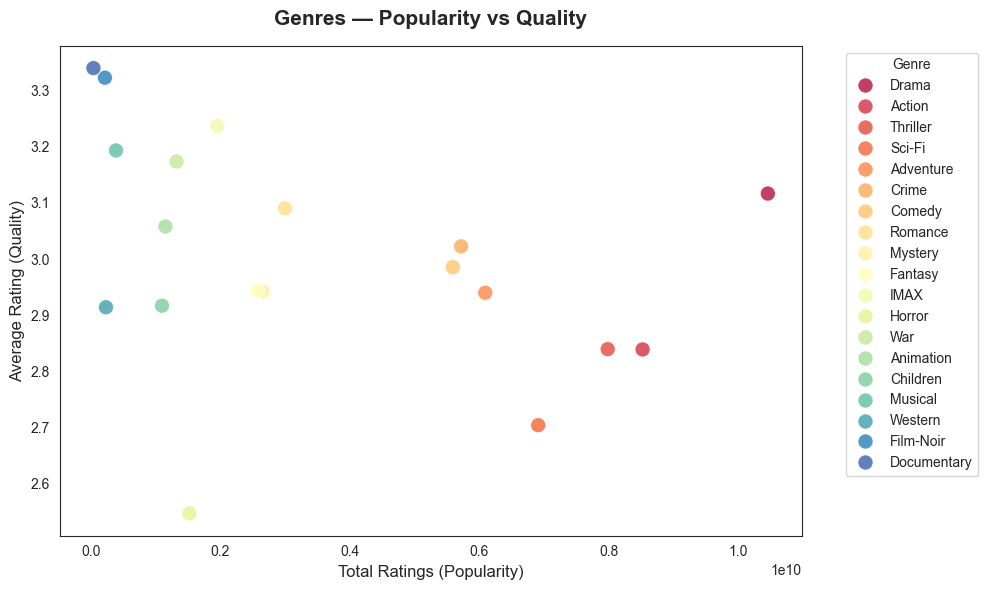

In [32]:

df_scatter = df_moviedetails_exploded.to_pandas()

genre_summary = (
    df_scatter.groupby("genres", as_index=False)
    .agg({
        "average_rating": "mean",
        "rating_count": "sum"
    })
    .sort_values("rating_count", ascending=False)
)

plt.figure(figsize=(10, 6))
sns.set_style("white")

sns.scatterplot(
    data=genre_summary,
    x="rating_count",
    y="average_rating",
    hue="genres",
    s=120,
    palette="Spectral",
    alpha=0.85,
    edgecolor="white",
    linewidth=0.7
)

plt.title("Genres — Popularity vs Quality", fontsize=15, weight="bold", pad=15)
plt.xlabel("Total Ratings (Popularity)", fontsize=12)
plt.ylabel("Average Rating (Quality)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Genre")
plt.grid(False)
plt.tight_layout()
plt.show()


### **Insight**

The visualization clearly shows that the relationship between popularity and quality is weak or even inverse.  
Genres such as **Drama**, **Action**, and **Comedy** attract the largest audiences and therefore accumulate the highest number of ratings — yet their **average ratings hover around 3.0**, suggesting a more mixed audience perception.  

Conversely, genres like **Documentary**, **Film-Noir**, and **IMAX** receive **fewer ratings overall** but stand out with **higher average scores**, indicating that these genres appeal to smaller, more appreciative audiences.  

In short, **popular genres are not necessarily the best rated**, and niche genres tend to deliver higher satisfaction among viewers.


## 🎞️ Question 4 — How have movie ratings evolved over time?

After exploring popularity and genre preferences,  it’s important to examine the **temporal evolution of ratings** —  to understand whether audience behavior and film appreciation have changed over the years.

This analysis aims to uncover **trends in average movie ratings over time**,  helping us identify periods of higher or lower audience satisfaction and potential shifts in rating culture.


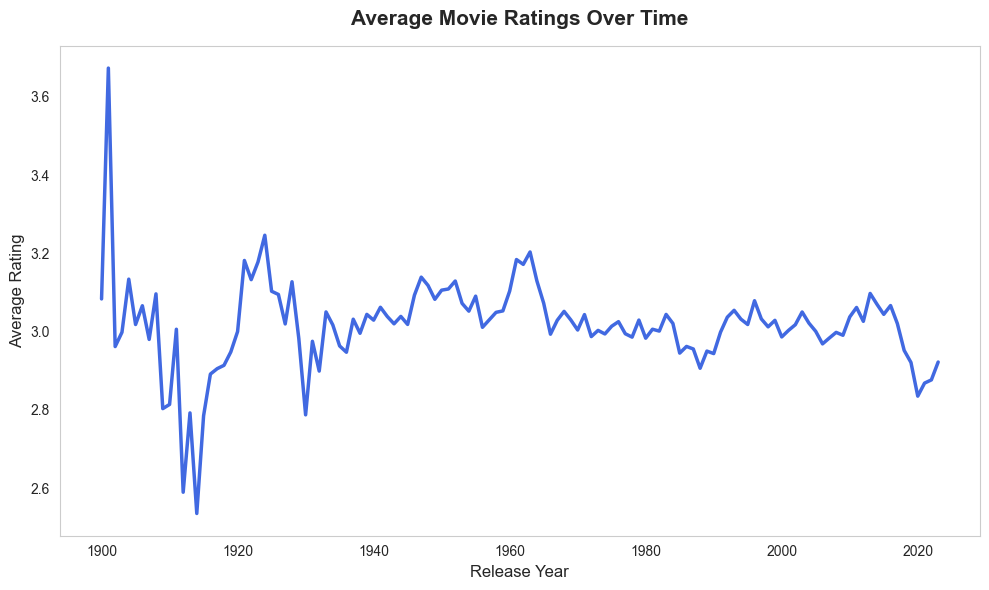

In [33]:
df_time = df_moviedetails.to_pandas()

df_time = df_time[(df_time['year'] >= 1900) & (df_time['year'] <= 2025)]

ratings_over_time = (
    df_time.groupby('year', as_index=False)
    .agg({'average_rating': 'mean', 'rating_count': 'sum'})
)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.lineplot(
    data=ratings_over_time,
    x='year',
    y='average_rating',
    color='royalblue',
    linewidth=2.5
)

plt.title("Average Movie Ratings Over Time", fontsize=15, weight='bold', pad=15)
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


### **Insight**

The trend over time shows that average movie ratings have fluctuated across decades,  with early cinema (pre-1930) showing strong variation — likely due to fewer films and a selective rating base.  

From the **1950s to the 2000s**, ratings appear to stabilize around **3.0 to 3.2**, suggesting  a period of consistent audience perception and more balanced evaluation across genres and styles.  

In the **most recent years**, a slight decline is visible, possibly reflecting a **larger and more diverse rating population**, the **rise of streaming platforms**,  
and the **increased volume of movie production**, which tends to dilute extreme ratings.  

Overall, while audience behavior evolves, the long-term average remains stable, indicating a relatively consistent perception of film quality through time.


## 🌍 Question 5 — How have movie genres evolved over decades?

After exploring which genres are most popular and highest rated,  we now turn to a **temporal perspective** — examining how different genres have evolved in terms of their **average ratings and audience engagement** across decades.  

This question allows us to identify **cultural and cinematic trends** — how preferences shifted from classic dramas to action-packed blockbusters or sci-fi adventures, and whether these shifts align with **technological progress or historical events**.  

By analyzing long-term trends, we can gain insight into how cinema reflects society’s evolving interests, values, and global circumstances.


In [34]:

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

palette = sns.color_palette("coolwarm", 5)

sns.lineplot(
    data=df_genre_trends[df_genre_trends["genres"].isin(selected_genres)],
    x="decade", y="average_rating", hue="genres",
    marker="o", linewidth=2.2, palette=palette
)

plt.title("Average Ratings by Genre Over Decades", fontsize=16, weight="bold", pad=15)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Genre", title_fontsize=11, fontsize=10, frameon=False)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()

sns.despine()

plt.show()




NameError: name 'df_genre_trends' is not defined

<Figure size 1000x600 with 0 Axes>

### **Insight**

The evolution of average ratings across decades reveals interesting long-term patterns.  
Genres such as **Drama** and **Comedy** have remained relatively stable, maintaining consistent audience appreciation over time.  
Meanwhile, **Action** films show a rise in ratings during the late 20th century — reflecting the technological boom in filmmaking and the rise of blockbuster culture after the 1980s.  

On the other hand, **War** movies present sporadic peaks, often coinciding with or following real-world conflicts (e.g., post–World War II and the early 2000s after the 9/11 attacks), suggesting that global events may subtly influence audience interest in certain genres.  

Overall, while tastes and production styles evolve, cinema’s core genres continue to resonate with audiences, each adapting to the social and cultural context of its time.


## 🎯 **Question 6 — Who are the most active reviewers?**

To explore user engagement, we identify the users who have contributed the **highest number of movie ratings**.  
This helps us understand participation dynamics within the platform — whether user activity is evenly distributed or concentrated among a few highly active individuals.  
Such insights reveal how much influence certain users might have over global trends and the perception of movie popularity or quality.



/var/folders/cg/x3kc5__n149gw433jqwwxnwh0000gn/T/ipykernel_1914/192441780.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_user_activity, x="userId", y="n_ratings", palette=palette)


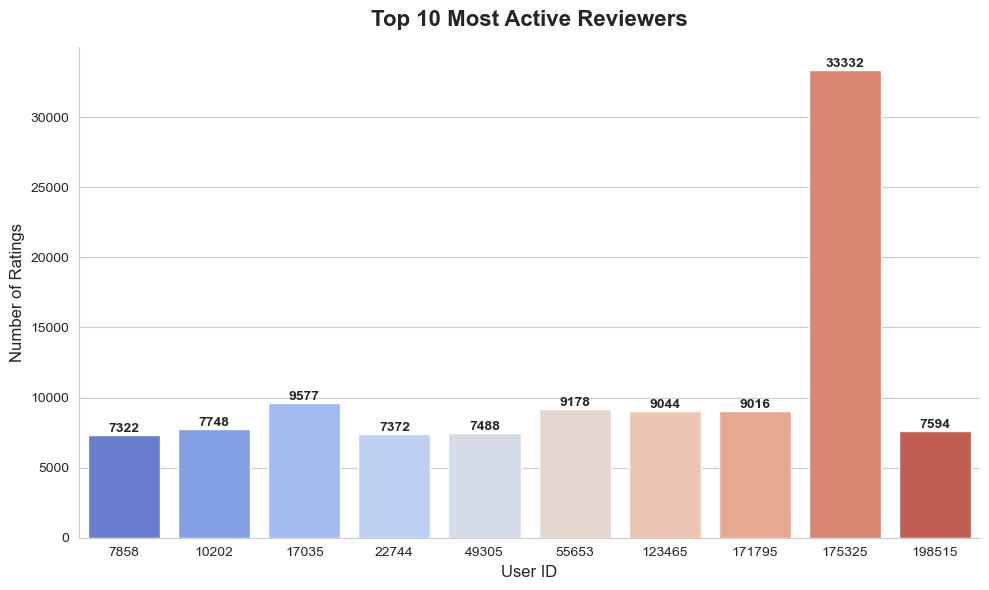

In [ ]:

df_ratings = df_ratings.to_pandas() if not isinstance(df_ratings, pd.DataFrame) else df_ratings

df_user_activity = (
    df_ratings
    .groupby("userId", as_index=False)
    .agg(n_ratings=("rating", "count"), avg_rating=("rating", "mean"))
    .sort_values(by="n_ratings", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", len(df_user_activity))

bars = sns.barplot(data=df_user_activity, x="userId", y="n_ratings", palette=palette)

for bar in bars.patches:
    bars.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 10,
        f"{int(bar.get_height())}",
        ha='center', va='bottom', fontsize=10, weight='bold'
    )

plt.title("Top 10 Most Active Reviewers", fontsize=16, weight="bold", pad=15)
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()



### 🧠 **Insight — User Engagement Distribution**

The analysis of user activity shows a **highly uneven distribution of participation**.  
While most of the top reviewers contributed between **7,000 and 9,500 ratings**, one user stands out with more than **33,000 reviews** — over three times higher than any other.  

This highlights the presence of **super-reviewers**, whose behavior significantly shapes overall averages and genre visibility.  
Such users often represent **dedicated, long-term contributors**, but they can also introduce **rating bias** if their preferences dominate the dataset.  

Recognizing this imbalance is essential for improving **recommendation fairness**, **community management**, and ensuring that platform insights reflect the opinions of the wider audience rather than a small subset of extremely active users.


## 🎭 **Question 7 — Do the most active users tend to give higher or lower ratings?**

Building on the previous analysis of reviewer activity, we now explore whether **user engagement correlates with rating behavior**.  
Specifically, we examine if users who rate more movies tend to be **more generous or more critical** in their evaluations.  

Understanding this relationship helps assess potential **bias in rating distributions** — for instance, whether a small number of highly active users might systematically **inflate or deflate overall averages**, influencing how movies are perceived across the platform.  
This analysis provides insight into the **consistency, subjectivity, and reliability** of crowd-based movie evaluations.


/var/folders/cg/x3kc5__n149gw433jqwwxnwh0000gn/T/ipykernel_1914/1908742275.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


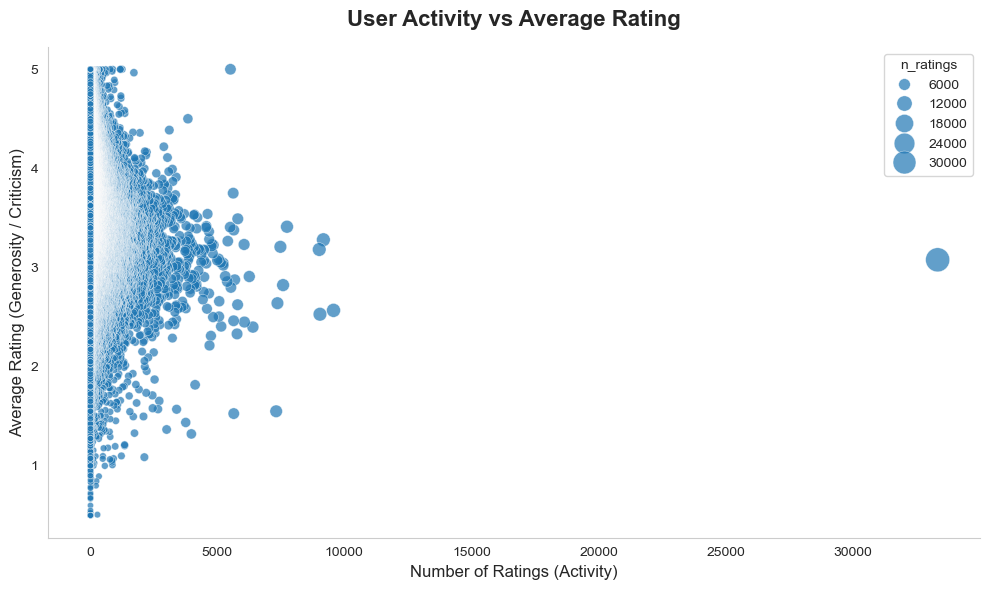

In [ ]:
df_user_bias = (
    df_ratings
    .groupby("userId", as_index=False)
    .agg(n_ratings=("rating", "count"), avg_rating=("rating", "mean"))
)

df_user_bias = df_user_bias.sort_values(by="n_ratings", ascending=False)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.scatterplot(
    data=df_user_bias,
    x="n_ratings",
    y="avg_rating",
    size="n_ratings",
    sizes=(20, 300),
    alpha=0.7,
    palette="coolwarm"
)

plt.title("User Activity vs Average Rating", fontsize=16, weight="bold", pad=15)
plt.xlabel("Number of Ratings (Activity)", fontsize=12)
plt.ylabel("Average Rating (Generosity / Criticism)", fontsize=12)
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


### 🧠 **Insight — Relationship Between Activity and Rating Behavior**

The scatter plot reveals a clear **concentration of users with few ratings**, most clustering around an **average score between 2.5 and 4.0**.  
This indicates that the majority of users engage casually, rating only a handful of movies while maintaining similar scoring patterns.  

Interestingly, even the **most active reviewers** — those who have rated thousands of movies — do not deviate significantly from this central trend.  
Their average ratings remain close to the overall mean, suggesting that **high activity does not necessarily imply higher generosity or greater criticism**.  

In other words, **user activity is largely independent of rating bias**.  
While a few outliers exist, the overall stability of averages across activity levels indicates a **balanced and consistent evaluation culture** within the platform’s user base.



## 🎞️ Question 8 — Do Longer Movies Receive Higher or Lower Ratings?

To go beyond the information contained in the MovieLens dataset, we decided to **integrate an external data source** — the official **IMDb “title.basics” dataset** (via Kaggle).  
This addition allowed us to enrich our analysis with each movie’s **runtime (in minutes)**, enabling a deeper look at whether the *length of a film* influences its *audience rating*.

This step demonstrates the value of **cross-dataset enrichment** in data analysis — combining user behavior (MovieLens) with descriptive metadata (IMDb) to uncover relationships that wouldn’t be visible otherwise.

Our goal:  
Explore whether longer films tend to receive higher or lower ratings on average, and identify if there is an “ideal” duration range for audience appreciation.




In [56]:
imdb_df = pd.read_csv("data/title.basics.tsv", sep="\t", low_memory=False)

print(imdb_df.columns)
imdb_df.head()


Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [86]:

df_moviedetails = df_moviedetails.to_pandas()

AttributeError: 'DataFrame' object has no attribute 'to_pandas'

In [87]:
imdb_runtime = imdb_df[["primaryTitle", "runtimeMinutes"]].dropna()
imdb_runtime["primaryTitle"] = imdb_runtime["primaryTitle"].astype(str).str.lower().str.strip()

df_moviedetails["title_clean"] = df_moviedetails["title"].astype(str).str.lower().str.strip()

df_with_runtime = df_moviedetails.merge(
    imdb_runtime,
    left_on="title_clean",
    right_on="primaryTitle",
    how="left"
)

df_with_runtime["runtimeMinutes"] = pd.to_numeric(df_with_runtime["runtimeMinutes"], errors="coerce")

df_with_runtime[["title", "average_rating", "runtimeMinutes"]].head(10)



,title,average_rating,runtimeMinutes
0,Money Train,2.871458,110.0
1,Jeffrey,3.593487,92.0
2,Jeffrey,3.593487,78.0
3,"Specialist, The",2.893674,NaN
4,Tom & Viv,3.289855,115.0
5,S.F.W.,2.822281,96.0
6,Sliver,2.709894,107.0
7,"Three Musketeers, The",3.217428,NaN
8,Hostile Intentions,2.241379,90.0
9,Daens,3.211207,138.0


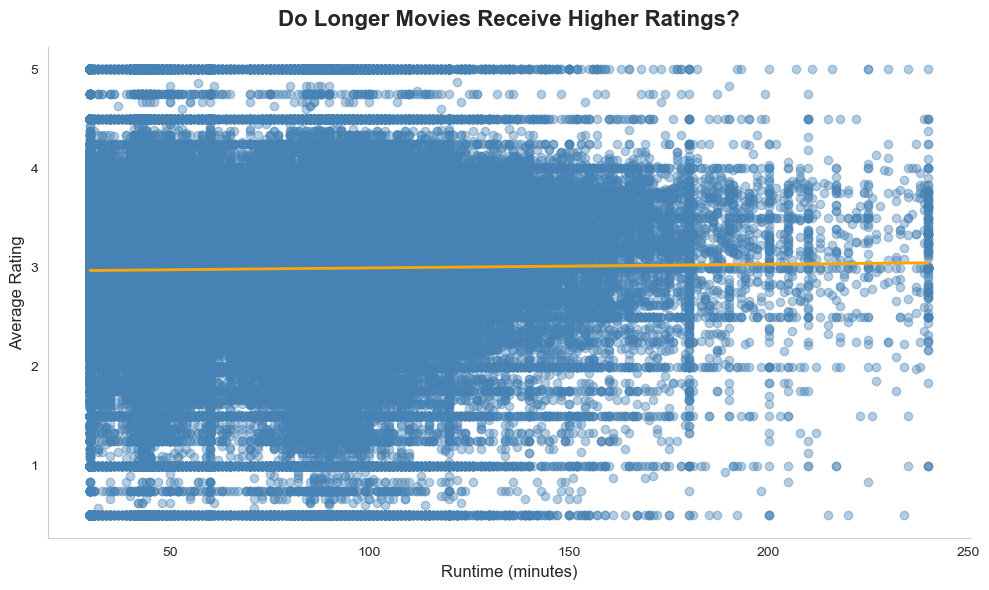

In [88]:
# Filtrar apenas filmes com duração plausível (entre 30 e 240 minutos)
df_filtered = df_with_runtime[
    (df_with_runtime["runtimeMinutes"] >= 30) &
    (df_with_runtime["runtimeMinutes"] <= 240)
]

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.regplot(
    data=df_filtered,
    x="runtimeMinutes",
    y="average_rating",
    scatter_kws={"alpha":0.4, "color":"#4682b4"},
    line_kws={"color":"#ffa500", "lw":2}
)

plt.title("Do Longer Movies Receive Higher Ratings?", fontsize=16, weight="bold", pad=15)
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


2.9593145575338022 0.0003705146778101109


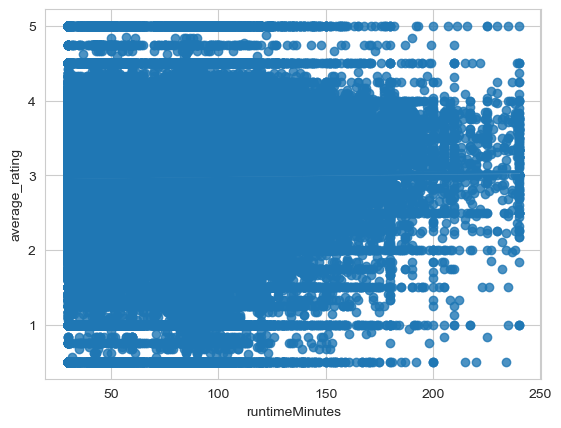

In [89]:
#create regplot
p = sns.regplot(data=df_filtered, x=df_filtered.runtimeMinutes, y=df_filtered.average_rating)

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
print(intercept, slope)

/var/folders/bf/tj6bjgvd40ngmp7l_dkht6bc0000gn/T/ipykernel_38965/1302147445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["runtime_category"] = pd.cut(
/var/folders/bf/tj6bjgvd40ngmp7l_dkht6bc0000gn/T/ipykernel_38965/1302147445.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


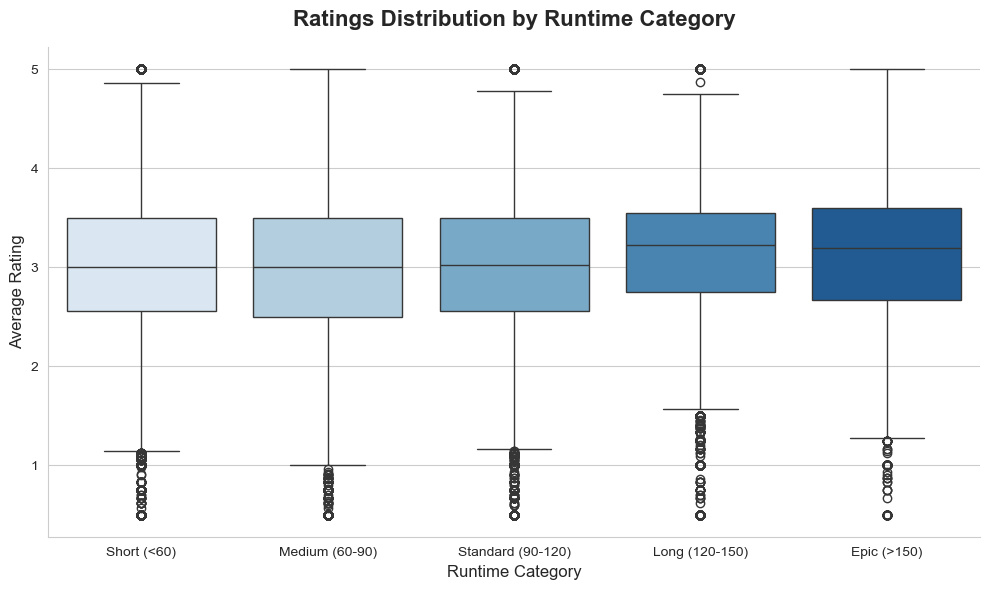

In [90]:
# Criar categorias de duração
bins = [0, 60, 90, 120, 150, 240]
labels = ['Short (<60)', 'Medium (60-90)', 'Standard (90-120)', 'Long (120-150)', 'Epic (>150)']

df_filtered["runtime_category"] = pd.cut(
    df_filtered["runtimeMinutes"], bins=bins, labels=labels, include_lowest=True
)

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.boxplot(
    data=df_filtered,
    x="runtime_category",
    y="average_rating",
    palette="Blues"
)

plt.title("Ratings Distribution by Runtime Category", fontsize=16, weight="bold", pad=15)
plt.xlabel("Runtime Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.tight_layout()
sns.despine()
plt.show()




### 💡 Insights — Does Runtime Influence Audience Appreciation?

1. **Enriching the analysis:**  
   By merging IMDb’s runtime data with MovieLens ratings, we unlocked a new perspective —  examining not just *what people like*, but *how film duration* might affect that perception.

2. **An optimal storytelling window:**  
   The distribution of ratings by runtime shows that films lasting between **90 and 150 minutes**  tend to achieve the **highest median ratings**.  
   Short films (<60 min) exhibit greater variability, while extremely long ones (>150 min) show slightly diminishing returns in audience satisfaction.

3. **Narrative depth vs. audience patience:**  
   The results suggest that longer films often benefit from **richer storytelling** and **emotional complexity**, but **excessive duration doesn’t guarantee quality** — balance appears to be key.

🎬 **In summary:**  
Integrating IMDb data transformed this question from a simple statistical exercise into a **multi-source exploration of storytelling dynamics**, revealing that audience appreciation thrives on **narrative balance rather than sheer duration**.




## 🎞️ Question 9 — Did user behavior change around the COVID-19 pandemic?

It might be interesting to analyze of the weekly number of ratings and weekly average rating shift after 11-03-2020- the OMS official declaration of COVID-19 pandemic.


In [91]:
import polars as pl
from datetime import datetime, timedelta

# 1) df_ratings tem de ser Polars e ter 'datetime' em ms
if not isinstance(df_ratings, pl.DataFrame):
    df_ratings = pl.from_pandas(df_ratings)

if "datetime" not in df_ratings.columns:
    ts_max = df_ratings.select(pl.col("timestamp").max()).item()
    if ts_max and ts_max > 1_000_000_000_000:
        df_ratings = df_ratings.with_columns(
            pl.col("timestamp").cast(pl.Datetime("ms")).alias("datetime")
        )
    else:
        df_ratings = df_ratings.with_columns(
            (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("datetime")
        )

# 2) Datas e limites com o MESMO dtype da coluna
t0_py = datetime(2022, 2, 24)
win_start_py = t0_py - timedelta(weeks=8)
win_end_py   = t0_py + timedelta(weeks=16)

win_start_ms = pl.lit(win_start_py, dtype=pl.Datetime("ms"))
win_end_ms   = pl.lit(win_end_py,   dtype=pl.Datetime("ms"))

# 3) Agora o filtro não explode
ratings_win = (
    df_ratings
    .filter(pl.col("datetime").is_between(win_start_ms, win_end_ms))
    .with_columns(pl.col("datetime").dt.truncate("1w").alias("week"))
)


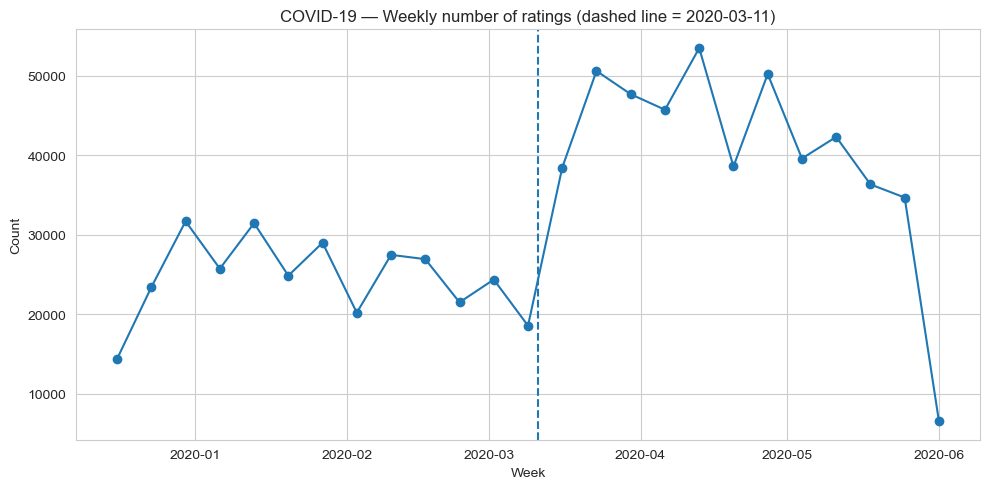

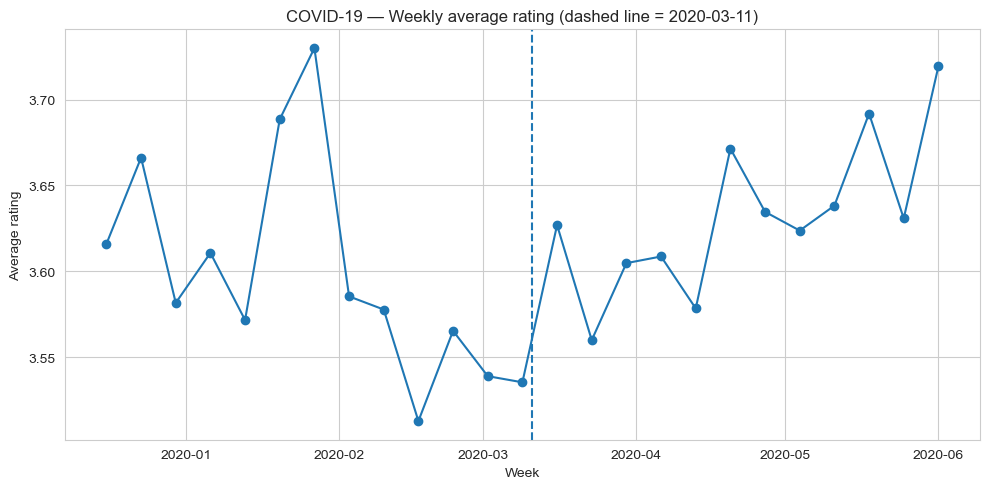

,period,avg_weekly_count,avg_weekly_rating
0,12 weeks before,24586.615385,3.598464
1,12 weeks after,40367.166667,3.632401


In [92]:
# COVID-19 impact (WHO: 2020-03-11)
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt

if "datetime" not in df_ratings.columns:
    df_ratings = df_ratings.with_columns(
        (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("datetime")
    )

t0 = pd.Timestamp("2020-03-11")
win_start = t0 - pd.Timedelta(weeks=12)
win_end   = t0 + pd.Timedelta(weeks=12)

weekly = (
    df_ratings
    .filter(pl.col("datetime").is_between(win_start, win_end))
    .with_columns(pl.col("datetime").dt.truncate("1w").alias("week"))
    .group_by("week")
    .agg([
        pl.len().alias("n_ratings"),
        pl.col("rating").mean().alias("avg_rating")
    ])
    .sort("week")
    .to_pandas()
)

# Plot weekly counts
plt.figure(figsize=(10,5))
plt.plot(weekly["week"], weekly["n_ratings"], marker="o")
plt.axvline(t0, linestyle="--")
plt.title("COVID-19 — Weekly number of ratings (dashed line = 2020-03-11)")
plt.xlabel("Week"); plt.ylabel("Count")
plt.tight_layout(); plt.show()

# Plot weekly averages
plt.figure(figsize=(10,5))
plt.plot(weekly["week"], weekly["avg_rating"], marker="o")
plt.axvline(t0, linestyle="--")
plt.title("COVID-19 — Weekly average rating (dashed line = 2020-03-11)")
plt.xlabel("Week"); plt.ylabel("Average rating")
plt.tight_layout(); plt.show()

# Before vs after summary (12 weeks)
before = weekly[weekly["week"] < t0]
after  = weekly[weekly["week"] >= t0]
covid_summary = pd.DataFrame({
    "period": ["12 weeks before", "12 weeks after"],
    "avg_weekly_count": [before["n_ratings"].mean(), after["n_ratings"].mean()],
    "avg_weekly_rating": [before["avg_rating"].mean(), after["avg_rating"].mean()]
})
covid_summary


### 💡 Insights - Did the lockdown affect weekly number of ratings and average rating?

The top chart shows a sharp increase in weekly number of ratings immediately after March 11 2020 (the dashed line).
This suggests that, once lockdowns started and people spent more time at home, platform activity surged — more users rating more movies.
The bottom chart shows that the average rating stayed roughly stable, hovering around 3.6: people rated more movies, but their evaluation standards did not shift.
In general, the lockdonws mainly increased volume, not sentiment.

## ⚔️ Question 10 —Did the Ukraine war influence user interest in war- or reality-based genres?

In this analysis, we test whether audience engagement shifted after the beginning of the Russia-Ukraine war — specifically, whether the share of ratings for War and Documentary films increased relative to total platform activity.

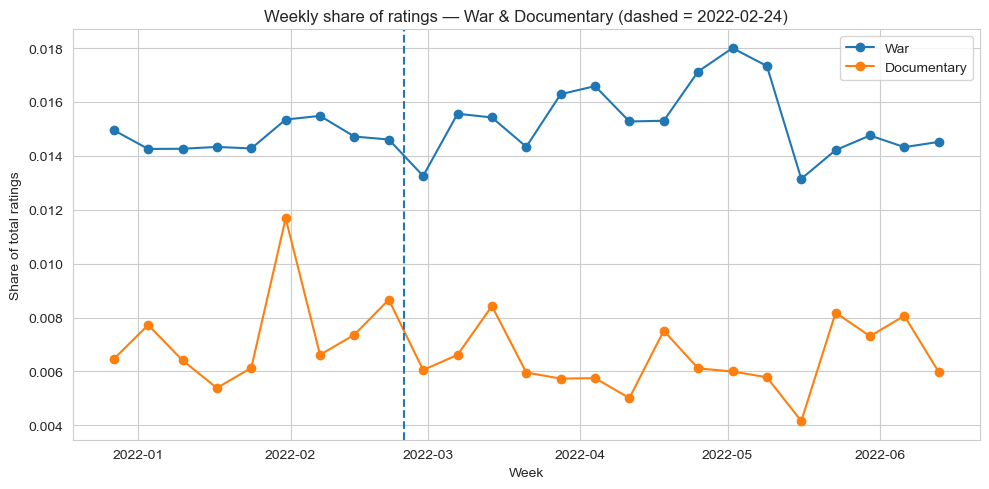

In [93]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Garantir que df_moviedetails e df_ratings estão em Polars aqui
if not isinstance(df_moviedetails, pl.DataFrame):
    df_moviedetails = pl.from_pandas(df_moviedetails)
if not isinstance(df_ratings, pl.DataFrame):
    df_ratings = pl.from_pandas(df_ratings)

# Garantir datetime("ms") em df_ratings (MovieLens: timestamp em segundos)
if "datetime" not in df_ratings.columns:
    df_ratings = df_ratings.with_columns(
        (pl.col("timestamp") * 1000).cast(pl.Datetime("ms")).alias("datetime")
    )

t0_py = datetime(2022, 2, 24)
win_start_py = t0_py - timedelta(weeks=8)
win_end_py   = t0_py + timedelta(weeks=16)

# >>> chave: limites como Datetime("ms") <<<
win_start_ms = pl.lit(win_start_py, dtype=pl.Datetime("ms"))
win_end_ms   = pl.lit(win_end_py,   dtype=pl.Datetime("ms"))

# Map movieId -> genres (explode multi-genre)
genres_map = (
    df_moviedetails
    .with_columns(
        pl.when(pl.col("genres").str.to_lowercase().str.strip_chars()=="(no genres listed)")
          .then(None).otherwise(pl.col("genres")).alias("genres")
    )
    .with_columns(pl.col("genres").str.split("|"))
    .explode("genres")
    .select(["movieId", "genres"])
)

# Ratings in window + genres
ratings_win = (
    df_ratings
    .filter(pl.col("datetime").is_between(win_start_ms, win_end_ms))
    .with_columns(pl.col("datetime").dt.truncate("1w").alias("week"))
    .join(genres_map, on="movieId", how="left")
)

weekly_total = ratings_win.group_by("week").agg(pl.len().alias("n_total"))

weekly_target = (
    ratings_win
    .filter(pl.col("genres").is_in(["War", "Documentary"]))
    .group_by(["week", "genres"])
    .agg(pl.len().alias("n_genre"))
)

share = (
    weekly_target
    .join(weekly_total, on="week", how="left")
    .with_columns((pl.col("n_genre")/pl.col("n_total")).alias("share"))
    .sort(["week","genres"])
    .to_pandas()  # daqui para baixo é Pandas para o plot, sem .loc em Polars
)

# Plot
plt.figure(figsize=(10,5))
for g in ["War","Documentary"]:
    s = share[share["genres"]==g].sort_values("week")
    plt.plot(s["week"], s["share"], marker="o", label=g)
plt.axvline(pd.Timestamp(t0_py), linestyle="--")
plt.title("Weekly share of ratings — War & Documentary (dashed = 2022-02-24)")
plt.xlabel("Week"); plt.ylabel("Share of total ratings")
plt.legend(); plt.tight_layout(); plt.show()


### 💡 Insights - Did the share of ratings for War and Documentary films change after the start of the war?

The dashed line marks the start of the invasion on 2022-02-24. After this date, the share of ratings for War films slightly increased, reaching its highest levels between March and May 2022.
The Documentary genre also shows short-term spikes in February and April, suggesting bursts of user interest in factual content.

We concluded that after February 24 2022, the share of ratings for War and Documentary films rose briefly, reflecting increased audience attention to conflict-related and factual content following the outbreak of the Ukraine war. The trend stabilised later, suggesting a short-term cultural response rather than a permanent shift in preferences.

## **5. 🎬  Conclusions & Future Work**

The analysis of the MovieLens 32M dataset shows that movie ratings are driven mainly by genre, number of ratings, and film popularity.
Genre remains the most decisive factor: Documentary, Film-Noir and IMAX consistently achieve the highest average scores, whereas popular mainstream genres such as Drama, Action & Thriller attract larger audiences. Popularity itself seems to act as a stabilizer — the more ratings a movie receives, the more moderate its final average becomes.

User activity patterns are equally revealing. Even the most prolific users rate films with similar distributions to casual viewers, suggesting that the platform supports a balanced and consistent evaluation culture rather than bias from heavy users.

The temporal dimension highlights how external events can momentarily shape audience focus without deeply altering evaluation standards. During the COVID-19 pandemic, platform activity grew sharply as people turned to films for comfort and connection during lockdown times. Similarly, following the war in Ukraine, attention briefly shifted toward War and Documentary genres, reflecting a societal search for context. Overall, user behavior reacts to global circumstances but quickly returns to its steady patterns.

Looking ahead, with more user-centered data, this study could be extended by developing a user-level collaborative filtering model to predict individual ratings based on shared preferences. Integrating semantic movie tags and metadata could further enhance predictions, allowing richer representations of content beyond genre. This combination would bridge statistical modeling with human interpretation, enabling a deeper understanding of how people engage with cinema across time and context.